<a href="https://colab.research.google.com/github/Buntariga2545/Project/blob/main/7_TSV_Models_regression_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
!wget -q https://github.com/Phonbopit/sarabun-webfont/raw/master/fonts/thsarabunnew-webfont.ttf
import matplotlib as mpl
mpl.font_manager.fontManager.addfont('thsarabunnew-webfont.ttf')
mpl.rc('font', family='TH Sarabun New')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data = pd.read_excel('/content/drive/MyDrive/Paper/Cleaned_Thermal_Data.xlsx', sheet_name='sheet_2', usecols=lambda x: 'Unnamed' not in x,)
data

Age        BMI  Temp    RH     V Thermal_acceptance  \
0     27  17.156262  30.5  42.9  0.13             Accept   
1     36  23.183673  30.5  42.9  0.13             Accept   
2     25  38.019565  30.5  42.9  0.13             Accept   
3     29  27.548209  30.5  42.9  0.13             Accept   
4     28  33.744173  30.5  42.9  0.13             Accept   
..   ...        ...   ...   ...   ...                ...   
188   37  27.160494  35.6  46.5  0.40             Accept   
189   23  18.591037  35.6  46.5  0.40           Unaccept   
190   27  16.456006  35.6  46.5  0.40             Accept   
191   57  23.255019  35.6  46.5  0.40             Accept   
192   64  21.170218  35.6  46.5  0.40             Accept   

     Thermal_sensation_Vote  อุณหภูมิ  ความชื้น  กระแสลม  ...   Clo  Met  \
0                         0         2         1        2  ...  0.55  1.2   
1                        -1         3         0        5  ...  0.55  1.2   
2                        -1         2         0        4  ...  0.55  1.2   
3                        -1         3         3        4  ...  0.55  1.2   
4                        -1         2         1        4  ...  0.55  1.2   
..                      ...       ...       ...      ...  ...   ...  ...   
188                       0         3         2        4  ...  0.55  1.2   
189                       0         3         1        4  ...  0.55  1.2   
190                       1         4         4        4  ...  0.55  1.2   
191                       1         3         1        5  ...  0.55  1.2   
192                       0         3         1        2  ...  0.55  1.2   

     พื้นที่ทำแบบสอบถาม_ภายนอก / ใต้ร่มไม้  \
0                                        0   
1                                        0   
2                                        0   
3                                        0   
4                                        0   
..                                     ...   
188                                      0   
189                                      0   
190                                      0   
191                                      0   
192                                      0   

     พื้นที่ทำแบบสอบถาม_ภายนอก/ กลางแจ้ง  \
0                                      0   
1                                      0   
2                                      0   
3                                      0   
4                                      0   
..                                   ...   
188                                    0   
189                                    0   
190                                    0   
191                                    0   
192                                    0   

     พื้นที่ทำแบบสอบถาม_ภายนอก/ มีหลังคาคลุม  พื้นที่ทำแบบสอบถาม_ภายใต้อาคาร  \
0                                          1                               0   
1                                          1                               0   
2                                          1                               0   
3                                          1                               0   
4                                          1                               0   
..                                       ...                             ...   
188                                        0                               1   
189                                        0                               1   
190                                        0                               1   
191                                        0                               1   
192                                        0                               1   

     seasons_summer  seasons_winter  เพศ_ชาย  เพศ_หญิง  
0                 0               1        1         0  
1                 0               1        1         0  
2                 0               1        0         1  
3                 0               1        1         0  
4                 0               1        

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 28 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Age                                      193 non-null    int64  
 1   BMI                                      193 non-null    float64
 2   Temp                                     193 non-null    float64
 3   RH                                       193 non-null    float64
 4   V                                        193 non-null    float64
 5   Thermal_acceptance                       193 non-null    object 
 6   Thermal_sensation_Vote                   193 non-null    int64  
 7   อุณหภูมิ                                 193 non-null    int64  
 8   ความชื้น                                 193 non-null    int64  
 9   กระแสลม                                  193 non-null    int64  
 10  ความแรงของแสงแดด                         193 non-n

In [ ]:
Y = data.values[:, 12]
Y

array([0, 0, 0, -1, -1, -1, -1, -1, 0, -1, -1, -1, 0, -1, 0, -1, 0, 0, -1,
       -1, -1, 0, -1, -1, -1, -1, 0, 0, 0, 1, -1, 0, -1, 0, 0, -1, 0, 0,
       0, 0, -1, 0, 0, 0, 0, -1, 0, 0, 0, -1, 0, -1, 0, 0, 0, -1, -1, -1,
       0, -1, -1, -1, -1, 0, -1, 0, 0, 0, -1, -1, 0, 0, -1, -1, 0, -1, 0,
       -1, 0, 0, -1, -1, 0, -1, -1, -1, -1, 0, -1, 0, -1, -1, -1, 0, -1,
       -1, 0, -1, -1, -1, -1, -1, -1, 0, -1, 0, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, 0, 0, -1, -1, -1, 0, 0, -1, 0, -1, 0, -1, -1, -1,
       0, -1, -1, -1, -1, -1, -1, -1, 0, -1, -1, -1, 0, 0, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, 0, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, 1, 1, -1, 0, -1, -1, -1, -1, 0, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, 0, -1, -1, -1, -1, -1], dtype=object)

In [ ]:
data.rename(columns = {'พื้นที่ทำแบบสอบถาม_ภายนอก/ มีหลังคาคลุม' : 'มีหลังคาคลุม', 'พื้นที่ทำแบบสอบถาม_ภายใต้อาคาร' : 'ภายใต้อาคาร', 'อุณหภูมิ' : 'ความรู้สึกถึงอุณหภูมิ', 'ความชื้น' : 'ความรู้สึกถึงความชื้น',
                       'กระแสลม' : 'ความรู้สึกถึงกระแสลม','ความแรงของแสงแดด' : 'ความรู้สึกถึงแสงแดด','เหงื่อบริเวณผิวหนัง' : 'ความรู้สึกถึงเหงื่อ', 'ความร้อน' : 'ความต้องการอุณหภูมิ','ความชื้น.1' : 'ความต้องการความชื้น', 'กระแสลม.1': 'ความต้องการกระแสลม', 'แสงแดด' : 'ความต้องการแสงแดด',
                       'เหงื่อบริเวณผิวหนัง.1': 'ความต้องการเหงื่อ'}, inplace = True)
data

Age        BMI  Temp    RH     V Thermal_acceptance  \
0     27  17.156262  30.5  42.9  0.13             Accept   
1     36  23.183673  30.5  42.9  0.13             Accept   
2     25  38.019565  30.5  42.9  0.13             Accept   
3     29  27.548209  30.5  42.9  0.13             Accept   
4     28  33.744173  30.5  42.9  0.13             Accept   
..   ...        ...   ...   ...   ...                ...   
188   37  27.160494  35.6  46.5  0.40             Accept   
189   23  18.591037  35.6  46.5  0.40           Unaccept   
190   27  16.456006  35.6  46.5  0.40             Accept   
191   57  23.255019  35.6  46.5  0.40             Accept   
192   64  21.170218  35.6  46.5  0.40             Accept   

     Thermal_sensation_Vote  ความรู้สึกถึงอุณหภูมิ  ความรู้สึกถึงความชื้น  \
0                         0                      2                      1   
1                        -1                      3                      0   
2                        -1                      2                      0   
3                        -1                      3                      3   
4                        -1                      2                      1   
..                      ...                    ...                    ...   
188                       0                      3                      2   
189                       0                      3                      1   
190                       1                      4                      4   
191                       1                      3                      1   
192                       0                      3                      1   

     ความรู้สึกถึงกระแสลม  ...   Clo  Met  \
0                       2  ...  0.55  1.2   
1                       5  ...  0.55  1.2   
2                       4  ...  0.55  1.2   
3                       4  ...  0.55  1.2   
4                       4  ...  0.55  1.2   
..                    ...  ...   ...  ...   
188                     4  ...  0.55  1.2   
189                     4  ...  0.55  1.2   
190                     4  ...  0.55  1.2   
191                     5  ...  0.55  1.2   
192                     2  ...  0.55  1.2   

     พื้นที่ทำแบบสอบถาม_ภายนอก / ใต้ร่มไม้  \
0                                        0   
1                                        0   
2                                        0   
3                                        0   
4                                        0   
..                                     ...   
188                                      0   
189                                      0   
190                                      0   
191                                      0   
192                                      0   

     พื้นที่ทำแบบสอบถาม_ภายนอก/ กลางแจ้ง  มีหลังคาคลุม  ภายใต้อาคาร  \
0                                      0             1            0   
1                                      0             1            0   
2                                      0             1            0   
3                                      0             1            0   
4                                      0             1            0   
..                                   ...           ...          ...   
188                                    0             0            1   
189                                    0             0            1   
190                                    0             0            1   
191                                    0             0            1   
192                                    0             0            1   

     seasons_summer  seasons_winter  เพศ_ชาย  เพศ_หญิง  
0                 0               1        1         0  
1                 0               1        1         0  
2                 0               1        0         1  
3                 0               1        1         0  
4                 0               1        1         0  
..              ...             ...      ...       ...  
188          

#Spitt data

##TSV 7

In [ ]:
fo_mapping = {
    -2 :0,
    -1 :1,
    0 : 2,
    1 : 3,
    2 : 4,
    3 : 5,
}

data['TSV7'] = data['Thermal_sensation_Vote'].map(fo_mapping)

In [ ]:
data.TSV7.value_counts()

2    59
3    53
1    39
4    22
5    16
0     4
Name: TSV7, dtype: int64

In [ ]:
data['TSV7'][data['TSV7']==0]

28    0
36    0
43    0
45    0
Name: TSV7, dtype: int64

In [ ]:
data.drop([28, 36, 43, 45], axis = 0, inplace=True)

In [ ]:
data

Age        BMI  Temp    RH     V Thermal_acceptance  \
0     27  17.156262  30.5  42.9  0.13             Accept   
1     36  23.183673  30.5  42.9  0.13             Accept   
2     25  38.019565  30.5  42.9  0.13             Accept   
3     29  27.548209  30.5  42.9  0.13             Accept   
4     28  33.744173  30.5  42.9  0.13             Accept   
..   ...        ...   ...   ...   ...                ...   
188   37  27.160494  35.6  46.5  0.40             Accept   
189   23  18.591037  35.6  46.5  0.40           Unaccept   
190   27  16.456006  35.6  46.5  0.40             Accept   
191   57  23.255019  35.6  46.5  0.40             Accept   
192   64  21.170218  35.6  46.5  0.40             Accept   

     Thermal_sensation_Vote  ความรู้สึกถึงอุณหภูมิ  ความรู้สึกถึงความชื้น  \
0                         0                      2                      1   
1                        -1                      3                      0   
2                        -1                      2                      0   
3                        -1                      3                      3   
4                        -1                      2                      1   
..                      ...                    ...                    ...   
188                       0                      3                      2   
189                       0                      3                      1   
190                       1                      4                      4   
191                       1                      3                      1   
192                       0                      3                      1   

     ความรู้สึกถึงกระแสลม  ...  Met  พื้นที่ทำแบบสอบถาม_ภายนอก / ใต้ร่มไม้  \
0                       2  ...  1.2                                      0   
1                       5  ...  1.2                                      0   
2                       4  ...  1.2                                      0   
3                       4  ...  1.2                                      0   
4                       4  ...  1.2                                      0   
..                    ...  ...  ...                                    ...   
188                     4  ...  1.2                                      0   
189                     4  ...  1.2                                      0   
190                     4  ...  1.2                                      0   
191                     5  ...  1.2                                      0   
192                     2  ...  1.2                                      0   

     พื้นที่ทำแบบสอบถาม_ภายนอก/ กลางแจ้ง  มีหลังคาคลุม  ภายใต้อาคาร  \
0                                      0             1            0   
1                                      0             1            0   
2                                      0             1            0   
3                                      0             1            0   
4                                      0             1            0   
..                                   ...           ...          ...   
188                                    0             0            1   
189                                    0             0            1   
190                                    0             0            1   
191                                    0             0            1   
192                                    0             0            1   

     seasons_summer  seasons_winter  เพศ_ชาย  เพศ_หญิง  TSV7  
0                 0               1        1         0     2  
1                 0               1        1         0     1  
2                 0               1        0         1     1  
3                 0               1        1         0     1  
4                 0               1        1         0     1  
..              ...             ...      ...       ...   ...  
188               1               0        1         0     2  
189               1               0        0         1     2  
19

##stratified fk
###แบ่งข้อมูลโดยใช้ 5-fold แล้วจัดการ imbalance class ด้วย smote (TSV7)

In [ ]:
import warnings
from sklearn.exceptions import ConvergenceWarning

warnings.filterwarnings(action='ignore', category=ConvergenceWarning)

In [ ]:
X = data.drop(['Thermal_acceptance','Thermal_sensation_Vote', 'TSV7'], axis = 1)
#y = data['Thermal_acceptance']
y2 = data['TSV7']

In [ ]:
from sklearn.model_selection import train_test_split, StratifiedKFold, StratifiedShuffleSplit, KFold
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler

kfold = StratifiedKFold(n_splits=5,shuffle=True,random_state=42)
splits = kfold.split(X,y2)
print(f'สัดส่วนของ TSV ใน dataset\n{y2.value_counts() / len(X)}\n\n')
for n,(train_index,test_index) in enumerate(splits):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y2_train, y2_test = y2.iloc[train_index], y2.iloc[test_index]


    # ทำมาตรฐานข้อมูล
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    X_train_scaled = pd.DataFrame(X_train_scaled, columns = X.columns)
    X_test_scaled = pd.DataFrame(X_test_scaled, columns = X.columns)


     # ใช้ SMOTE สำหรับการทำ resampling ข้อมูลชุดฝึก
    smote = SMOTE(k_neighbors=2, random_state=42)
    X_train_res, y2_train_res = smote.fit_resample(X_train_scaled, y2_train)

    print(f'SPLIT NO {n+1}\nTRAINING SET SIZE: {np.round(len(train_index) / (len(train_index)+len(test_index)),2)}'+
          f'\tTEST SET SIZE: {np.round(len(test_index) / (len(train_index)+len(test_index)),2)}\nสัดส่วนของ TSV ใน TRAINING SET\n'+
          f'{data.iloc[test_index,28].value_counts() / len(data.iloc[test_index,28])}\nสัดส่วนของ TSV ใน TEST SET\n'+
          f'{data.iloc[train_index,28].value_counts() / len(data.iloc[train_index,28])}\n\n')
    print(f"Training set size after resampling: {X_train_res.shape}")
    print(f"Test set size: {X_test_scaled.shape}")

สัดส่วนของ TSV ใน dataset
2    0.312169
3    0.280423
1    0.206349
4    0.116402
5    0.084656
Name: TSV7, dtype: float64


SPLIT NO 1
TRAINING SET SIZE: 0.8	TEST SET SIZE: 0.2
สัดส่วนของ TSV ใน TRAINING SET
2    0.315789
3    0.289474
1    0.210526
4    0.105263
5    0.078947
Name: TSV7, dtype: float64
สัดส่วนของ TSV ใน TEST SET
2    0.311258
3    0.278146
1    0.205298
4    0.119205
5    0.086093
Name: TSV7, dtype: float64


Training set size after resampling: (235, 26)
Test set size: (38, 26)
SPLIT NO 2
TRAINING SET SIZE: 0.8	TEST SET SIZE: 0.2
สัดส่วนของ TSV ใน TRAINING SET
2    0.315789
3    0.263158
1    0.210526
4    0.131579
5    0.078947
Name: TSV7, dtype: float64
สัดส่วนของ TSV ใน TEST SET
2    0.311258
3    0.284768
1    0.205298
4    0.112583
5    0.086093
Name: TSV7, dtype: float64


Training set size after resampling: (235, 26)
Test set size: (38, 26)
SPLIT NO 3
TRAINING SET SIZE: 0.8	TEST SET SIZE: 0.2
สัดส่วนของ TSV ใน TRAINING SET
2    0.315789
3    0.263158
1    0.21

In [ ]:
y2_train_res.value_counts()

2    48
1    48
3    48
4    48
5    48
Name: TSV7, dtype: int64

In [ ]:
data.TSV7.value_counts()

2    59
3    53
1    39
4    22
5    16
Name: TSV7, dtype: int64

##SVR

###TSV 7 ค่า

In [ ]:
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix

from sklearn.svm import SVR
from sklearn.metrics import r2_score,mean_squared_error
import seaborn as sns

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from math import sqrt

#mean_squared_error(actual_values, predicted_values)
# taking root of mean squared error
#root_mean_squared_error = sqrt(mean_squared_error)

In [ ]:
# Essentials
import numpy as np
import pandas as pd
import datetime
import random

# Plots
import seaborn as sns
import matplotlib.pyplot as plt

# Models
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, BaggingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.linear_model import ElasticNet, ElasticNetCV
from sklearn.svm import SVC
from sklearn.svm import SVR
from mlxtend.regressor import StackingCVRegressor
import lightgbm as lgb
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor

# Stats
from scipy.stats import skew, norm
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax

# Misc
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.decomposition import PCA

In [ ]:
#GridSearchCV for SVR
from sklearn.svm import SVR

C = np.array([0.001, 0.01, 0.05, 0.1, 0.5, 1, 5, 10])
epsilon = [0.001, 0.01, 0.1, 0.5, 1, 2, 4, 5]
space = [{'kernel': ['linear'], 'C' : C, 'gamma' : C, 'epsilon' : epsilon},
            {'kernel': ['rbf'], 'C' : C, 'gamma' : C, 'epsilon' : epsilon},
            {'kernel': ['sigmoid'], 'C' : C, 'gamma' : C, 'epsilon' : epsilon},
            {'kernel': ['poly'], 'C' : C, 'gamma' : C, 'epsilon' : epsilon}]

gs = GridSearchCV(SVR(), param_grid = space, scoring = 'r2', cv = 5, n_jobs = -1)
ge_results = gs.fit(X_train_res, y2_train_res)
print("Best accuracy :", ge_results.best_score_)
print("Best parameters :", ge_results.best_params_)
print('R_Square:', format(ge_results.best_score_))
print('Best parameters:', format(ge_results.best_params_))

Best parameters : 0.7067165355274082
Best accuracy : {'C': 10.0, 'epsilon': 0.1, 'gamma': 0.05, 'kernel': 'rbf'}
R_Square: 0.7067165355274082
Best parameters: {'C': 10.0, 'epsilon': 0.1, 'gamma': 0.05, 'kernel': 'rbf'}


In [ ]:
param_grid = {
    'kernel': ['linear', 'poly', 'rbf'],
    'C': [0.001, 0.01, 0.05, 0.1, 0.5, 1, 5, 10],
    'gamma': [0.01, 0.05, 0.1, 0.5, 1],
    'epsilon': [0.001, 0.01, 0.1, 0.5, 1]
}

gs = GridSearchCV(SVR(), param_grid, scoring = 'r2', cv = 5, n_jobs = -1)
ge_results = gs.fit(X_train_res, y2_train_res)
print("Best accuracy :", ge_results.best_score_)
print("Best parameters :", ge_results.best_params_)

Best accuracy : 0.7067165355274082
Best parameters : {'C': 10, 'epsilon': 0.1, 'gamma': 0.05, 'kernel': 'rbf'}


In [ ]:
svr_reg = SVR(C = 10, kernel = 'rbf', epsilon = 0.1, gamma = 0.05)

# Train the model
results = svr_reg.fit(X_train_res, y2_train_res)

# Make predictions on the test set
y_pred = svr_reg.predict(X_test_scaled)

print('MSE_train: {:.15f}'. format(mean_squared_error(y2_train_res, results.predict(X_train_res))))
print('MSE_test: {:.15f}'. format(mean_squared_error(y2_test, results.predict(X_test_scaled))))

print('MAE_train: {:.15f}'. format(mean_absolute_error(y2_train_res, results.predict(X_train_res))))
print('MAE_test: {:.15f}'. format(mean_absolute_error(y2_test, results.predict(X_test_scaled))))

print("R-squared Score_train:", format(r2_score(y2_train_res, results.predict(X_train_res))))
print("R-squared Score_test:", format(r2_score(y2_test, results.predict(X_test_scaled))))

MSE_train: 0.010581033247199
MSE_test: 0.768578883627424
MAE_train: 0.088486263937116
MAE_test: 0.665333813550891
R-squared Score_train: 0.9947094833764006
R-squared Score_test: 0.44446436553012514


In [ ]:
svr_reg = SVR(C = 10, kernel = 'rbf', epsilon = 0.01, gamma = 0.1)

# Train the model
results = svr_reg.fit(X_train_res, y2_train_res)

# Make predictions on the test set
y_pred = svr_reg.predict(X_test_scaled)

print('MSE_train: {:.15f}'. format(mean_squared_error(y2_train_res, results.predict(X_train_res))))
print('MSE_test: {:.15f}'. format(mean_squared_error(y2_test, results.predict(X_test_scaled))))

print('MAE_train: {:.15f}'. format(mean_absolute_error(y2_train_res, results.predict(X_train_res))))
print('MAE_test: {:.15f}'. format(mean_absolute_error(y2_test, results.predict(X_test_scaled))))

print("R-squared Score_train:", format(r2_score(y2_train_res, results.predict(X_train_res))))
print("R-squared Score_test:", format(r2_score(y2_test, results.predict(X_test_scaled))))

MSE_train: 0.000172222009917
MSE_test: 0.694170761030768
MAE_train: 0.010103497655972
MAE_test: 0.659386733781406
R-squared Score_train: 0.9999138889950413
R-squared Score_test: 0.4982472165516778


In [ ]:
param_grid = {
    'kernel': ['linear', 'poly', 'rbf'],
    'C': [0.001, 0.01, 0.05, 0.1, 0.5, 1, 5, 10],
    'gamma': [0.01, 0.05, 0.1, 0.5, 1],
    'epsilon': [0.001, 0.01, 0.1, 0.5, 1]
}

gs = GridSearchCV(SVR(), param_grid, scoring = 'r2', cv = kfold, n_jobs = -1)
ge_results = gs.fit(X_train_res, y2_train_res)
print("Best accuracy :", ge_results.best_score_)
print("Best parameters :", ge_results.best_params_)

Best accuracy : 0.888716190748255
Best parameters : {'C': 5, 'epsilon': 0.01, 'gamma': 0.05, 'kernel': 'rbf'}


In [ ]:
svr_reg = SVR(C = 5, kernel = 'rbf', epsilon = 0.01, gamma = 0.05)

# Train the model
results = svr_reg.fit(X_train_res, y2_train_res)

# Make predictions on the test set
y_pred = svr_reg.predict(X_test_scaled)

print('MSE_train: {:.15f}'. format(mean_squared_error(y2_train_res, results.predict(X_train_res))))
print('MSE_test: {:.15f}'. format(mean_squared_error(y2_test, results.predict(X_test_scaled))))

print('MAE_train: {:.15f}'. format(mean_absolute_error(y2_train_res, results.predict(X_train_res))))
print('MAE_test: {:.15f}'. format(mean_absolute_error(y2_test, results.predict(X_test_scaled))))

#print("R-squared Score_train:", format(r2_score(y2_train_res, results.predict(X_train_res))))
#print("R-squared Score_test:", format(r2_score(y2_test, results.predict(X_test_scaled))))

MSE_train: 0.019406480710287
MSE_test: 0.748342807984765
MAE_train: 0.042605614027341
MAE_test: 0.663045681300846


In [ ]:
kfold

###SHAP

In [ ]:
!pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 538.2/538.2 kB 8.6 MB/s eta 0:00:00


In [ ]:
import shap

In [ ]:
# SHAP Interpreter
shapExplainer = shap.TreeExplainer(results)
shapValues = shapExplainer.shap_values(X)

# Explainer details
shapExplainer.__dict__

# Summary features contribute in model
shap.summary_plot(shapValues, X, plot_type = 'bar')

###PDP

In [ ]:
from sklearn.inspection import PartialDependenceDisplay

In [ ]:
base_features = ['อุณหภูมิ', 'TMRT', 'Temp', 'เพศ_ชาย', 'Age']

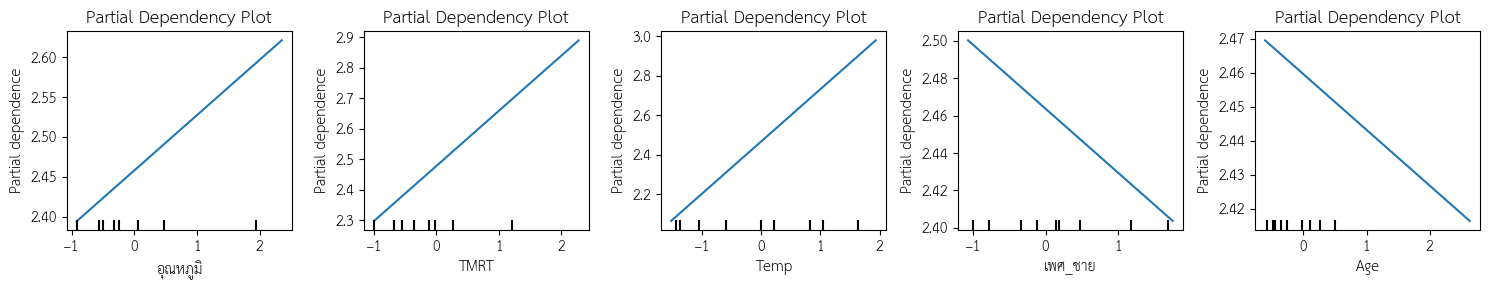

In [ ]:
n_cols = len(base_features)  # จำนวนคอลัมน์ตามจำนวน features
fig, axs = plt.subplots(nrows=1, ncols=n_cols, figsize=(n_cols * 3, 3))  # ปรับขนาดให้เหมาะสม

for i, bf in enumerate(base_features):
    PartialDependenceDisplay.from_estimator(
        results,
        X_train_res,
        features=[bf],
        feature_names=base_features,
        grid_resolution = 10,
        ax=axs[i]  # ใช้ axis ที่ i
    )
    axs[i].set_title("Partial Dependency Plot")

plt.tight_layout()
plt.show()

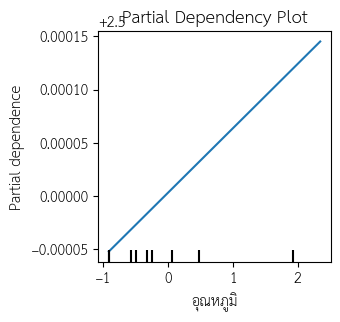

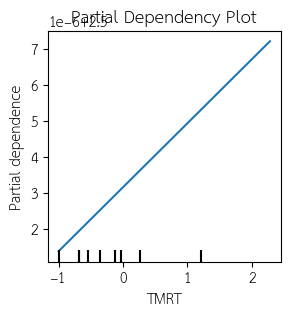

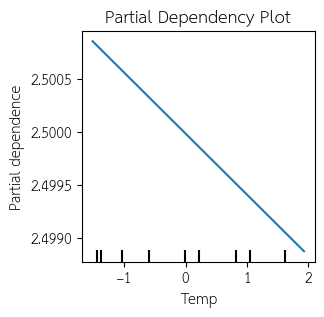

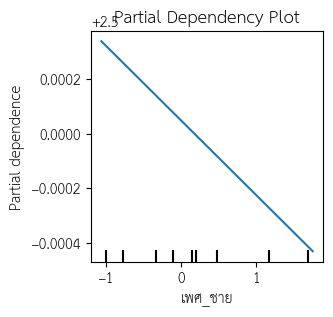

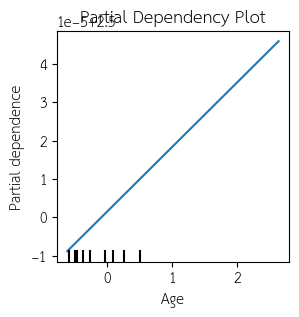

In [ ]:
for bf in base_features:
      fig, ax = plt.subplots(figsize=(3, 3))
      ax.set_title("Partial Dependency Plot")
      PartialDependenceDisplay.from_estimator(results,
                                        X_train_res,
                                        features = [bf],
                                        feature_names = base_features,
                                        grid_resolution = 10,
                                        ax = ax)
      plt.show()

##XGBOOST

###TSV 7 ค่า

In [ ]:
import xgboost as xgb

param_dist = {
    'max_depth': [5, 9, 10, 14, 20],
    'subsample': [1, 0.8, 0.6, 0.3],
    'colsample_bytree': [1, 0.8, 0.6, 0.3],
    'learning_rate': [0.001, 0.01, 0.1],
    'n_estimators': [100, 200, 300]
}

#    'reg_alpha': [0.001, 0.01, 0.1],
#    'reg_lambda': [0.001, 0.01, 0.1]

In [ ]:
kfold

In [ ]:
import xgboost as xgb
from sklearn.datasets import fetch_california_housing
from sklearn.metrics import mean_squared_error, r2_score

#Creating an XGBoost regressor
model = xgb.XGBRegressor()
xgbr = GridSearchCV(model, param_dist, cv = kfold)

#Training the model on the training data
xgb_reg = xgbr.fit(X_train_res, y2_train_res)

print("Best parameters :", xgb_reg.best_score_)
print("Best accuracy :", xgb_reg.best_params_)

Best parameters : 0.8549208112957677
Best accuracy : {'colsample_bytree': 0.6, 'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 200, 'subsample': 0.3}


In [ ]:
xgb_reg = xgb.XGBRegressor(colsample_bytree = 0.6, learning_rate = 0.1, max_depth = 10, n_estimators = 200, subsample = 0.3)

# Train the model
result = xgb_reg.fit(X_train_res, y2_train_res)

# Make predictions on the test set
y_pred = xgb_reg.predict(X_test_scaled)

print('MSE_train: {:.15f}'. format(mean_squared_error(y2_train_res, result.predict(X_train_res))))
print('MSE_test: {:.15f}'. format(mean_squared_error(y2_test, result.predict(X_test_scaled))))

print('MAE_train: {:.15f}'. format(mean_absolute_error(y2_train_res, result.predict(X_train_res))))
print('MAE_test: {:.15f}'. format(mean_absolute_error(y2_test, result.predict(X_test_scaled))))

#print("R-squared Score_train:", format(r2_score(y2_train_res, results.predict(X_train_res))))
#print("R-squared Score_test:", format(r2_score(y2_test, results.predict(X_test_scaled))))

MSE_train: 0.002239719472774
MSE_test: 0.597072655454090
MAE_train: 0.031702611843745
MAE_test: 0.575864002511308


In [ ]:
#predictions = xgbr.predict(X_test_scaled)

xgb_reg = xgb.XGBRegressor(colsample_bytree = 0.6, learning_rate = 0.1, max_depth = 10, n_estimators = 200, subsample = 0.3)

# Train the model
result = xgb_reg.fit(X_train_res, y2_train_res)

# Make predictions on the test set
y_pred = xgb_reg.predict(X_test_scaled)

# Calculate the mean squared error and R-squared score
mse_train = mean_squared_error(y2_train_res, xgb_reg.predict(X_train_res))
r2_train = r2_score(y2_train_res, xgb_reg.predict(X_train_res))
mae_train = mean_absolute_error(y2_train_res, xgb_reg.predict(X_train_res))

mse_test = mean_squared_error(y2_test, result.predict(X_test_scaled))
r2_test = r2_score(y2_test, result.predict(X_test_scaled))
mae_test = mean_absolute_error(y2_test, result.predict(X_test_scaled))

print("Mean Squared Error: {:.15f}". format(mse_train))
print("R-squared Score: {:.15f}". format(r2_train))
print("Mean Absolute Error: {:.15f}". format(mae_train))

print("Mean Squared Error: {:.15f}". format(mse_test))
print("R-squared Score: {:.15f}". format(r2_test))
print("Mean Absolute Error: {:.15f}". format(mae_test))

Mean Squared Error: 0.002239719472774
R-squared Score: 0.998880140263613
Mean Absolute Error: 0.031702611843745
Mean Squared Error: 0.597072655454090
R-squared Score: 0.568430588533976
Mean Absolute Error: 0.575864002511308


In [ ]:
xgb_reg = xgb.XGBRegressor(colsample_bytree = 0.3, max_depth = 5, subsample = 0.8)

# Train the model
result = xgb_reg.fit(X_train_res, y2_train_res)

# Make predictions on the test set
y_pred = xgb_reg.predict(X_test_scaled)

print('MSE_train: {:.15f}'. format(mean_squared_error(y2_train_res, result.predict(X_train_res))))
print('MSE_test: {:.15f}'. format(mean_squared_error(y2_test, result.predict(X_test_scaled))))

print('MAE_train: {:.15f}'. format(mean_absolute_error(y2_train_res, result.predict(X_train_res))))
print('MAE_test: {:.15f}'. format(mean_absolute_error(y2_test, result.predict(X_test_scaled))))

print("R-squared Score_train:", format(r2_score(y2_train_res, results.predict(X_train_res))))
print("R-squared Score_test:", format(r2_score(y2_test, results.predict(X_test_scaled))))

MSE_train: 0.000351235545571
MSE_test: 0.636984235867710
MAE_train: 0.012613219022751
MAE_test: 0.585809909008645
R-squared Score_train: 0.9902967596448564
R-squared Score_test: 0.45909118050097997


In [ ]:
# กำหนด hyperparameters ที่ต้องการทดสอบ
param_grid = {
    'learning_rate': [0.1, 0.01, 0.001],
    'max_depth': [3, 5, 7, 10],
    'min_child_weight': [1, 3, 5],
    'subsample': [0.5, 0.7],
    'colsample_bytree': [0.5, 0.7],
    'n_estimators': [100, 200, 300]
}

# ใช้ GridSearchCV
grid_search = GridSearchCV(estimator=xgb.XGBRegressor(), param_grid=param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train_res, y2_train_res)

# หรือใช้ RandomizedSearchCV
# randomized_search = RandomizedSearchCV(estimator=xgb.XGBRegressor(), param_distributions=param_grid, n_iter=50, cv=5, n_jobs=-1)
# randomized_search.fit(X_train, y_train)

# แสดงค่า hyperparameters ที่ดีที่สุด
print("Best hyperparameters found using GridSearchCV:")
print(grid_search.best_params_)
# print("Best hyperparameters found using RandomizedSearchCV:")
# print(randomized_search.best_params_)

# ทดสอบโมเดลที่ดีที่สุดบนชุดข้อมูล Test
best_model = grid_search.best_estimator_
# best_model = randomized_search.best_estimator_
y_pred = best_model.predict(X_test_scaled)
mse = mean_squared_error(y2_test, y_pred)
print("Mean Squared Error on test set:", mse)

Best hyperparameters found using GridSearchCV:
{'colsample_bytree': 0.5, 'learning_rate': 0.1, 'max_depth': 7, 'min_child_weight': 1, 'n_estimators': 300, 'subsample': 0.5}
Mean Squared Error on test set: 0.5081245705126796


In [ ]:
xgb_reg = xgb.XGBRegressor(colsample_bytree = 0.5, learning_rate = 0.1, max_depth = 7, min_child_weight = 1, n_estimators = 300, subsample = 0.5)

# Train the model
result = xgb_reg.fit(X_train_res, y2_train_res)

# Make predictions on the test set
y_pred = xgb_reg.predict(X_test_scaled)

# Calculate the mean squared error and R-squared score
mse_train = mean_squared_error(y2_train_res, xgb_reg.predict(X_train_res))
r2_train = r2_score(y2_train_res, xgb_reg.predict(X_train_res))
mae_train = mean_absolute_error(y2_train_res, xgb_reg.predict(X_train_res))

mse_test = mean_squared_error(y2_test, result.predict(X_test_scaled))
r2_test = r2_score(y2_test, result.predict(X_test_scaled))
mae_test = mean_absolute_error(y2_test, result.predict(X_test_scaled))

print("Mean Squared Error: {:.15f}". format(mse_train))
print("R-squared Score: {:.15f}". format(r2_train))
print("Mean Absolute Error: {:.15f}". format(mae_train))

print("Mean Squared Error: {:.15f}". format(mse_test))
print("R-squared Score: {:.15f}". format(r2_test))
print("Mean Absolute Error: {:.15f}". format(mae_test))

Mean Squared Error: 0.000015695971819
R-squared Score: 0.999992152014091
Mean Absolute Error: 0.002576972295841
Mean Squared Error: 0.508124570512680
R-squared Score: 0.632723053309473
Mean Absolute Error: 0.524146448921513


In [ ]:
param_grid = {
    'learning_rate': [0.1, 0.01, 0.001],
    'max_depth': [3, 5, 7, 10],
    'min_child_weight': [1, 3, 5],
    'subsample': [0.5, 0.7],
    'colsample_bytree': [0.5, 0.7],
    'n_estimators': [100, 200, 300]
}

# ใช้ GridSearchCV
grid_search = GridSearchCV(estimator=xgb.XGBRegressor(), param_grid=param_grid, cv=kfold, n_jobs=-1)
grid_search.fit(X_train_res, y2_train_res)

# หรือใช้ RandomizedSearchCV
# randomized_search = RandomizedSearchCV(estimator=xgb.XGBRegressor(), param_distributions=param_grid, n_iter=50, cv=5, n_jobs=-1)
# randomized_search.fit(X_train, y_train)

# แสดงค่า hyperparameters ที่ดีที่สุด
print("Best hyperparameters found using GridSearchCV:")
print(grid_search.best_params_)
# print("Best hyperparameters found using RandomizedSearchCV:")
# print(randomized_search.best_params_)

# ทดสอบโมเดลที่ดีที่สุดบนชุดข้อมูล Test
best_model = grid_search.best_estimator_
# best_model = randomized_search.best_estimator_
y_pred = best_model.predict(X_test_scaled)
mse = mean_squared_error(y2_test, y_pred)
print("Mean Squared Error on test set:", mse)

Best hyperparameters found using GridSearchCV:
{'colsample_bytree': 0.7, 'learning_rate': 0.1, 'max_depth': 10, 'min_child_weight': 3, 'n_estimators': 300, 'subsample': 0.5}
Mean Squared Error on test set: 0.5851250317482889


In [ ]:
xgb_reg = xgb.XGBRegressor(colsample_bytree = 0.7, learning_rate = 0.1, max_depth = 10, min_child_weight = 3, n_estimators = 300, subsample = 0.5)

# Train the model
result = xgb_reg.fit(X_train_res, y2_train_res)

# Make predictions on the test set
y_pred = xgb_reg.predict(X_test_scaled)

# Calculate the mean squared error and R-squared score
mse_train = mean_squared_error(y2_train_res, xgb_reg.predict(X_train_res))
r2_train = r2_score(y2_train_res, xgb_reg.predict(X_train_res))
mae_train = mean_absolute_error(y2_train_res, xgb_reg.predict(X_train_res))

mse_test = mean_squared_error(y2_test, result.predict(X_test_scaled))
r2_test = r2_score(y2_test, result.predict(X_test_scaled))
mae_test = mean_absolute_error(y2_test, result.predict(X_test_scaled))

print("Mean Squared Error: {:.15f}". format(mse_train))
print("R-squared Score: {:.15f}". format(r2_train))
print("Mean Absolute Error: {:.15f}". format(mae_train))

print("Mean Squared Error: {:.15f}". format(mse_test))
print("R-squared Score: {:.15f}". format(r2_test))
print("Mean Absolute Error: {:.15f}". format(mae_test))

Mean Squared Error: 0.000213794393250
R-squared Score: 0.999893102803375
Mean Absolute Error: 0.006495064496994
Mean Squared Error: 0.585125031748289
R-squared Score: 0.577066436925339
Mean Absolute Error: 0.547049052006490


###Plot XGBOOST

TSV 7 ค่า

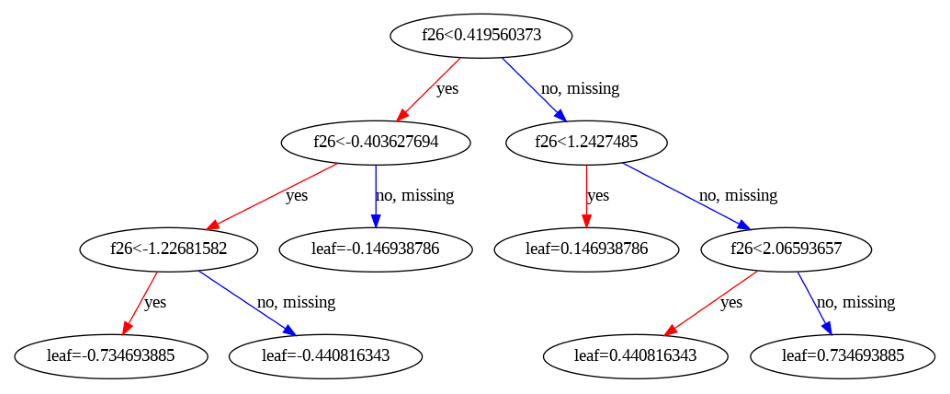

In [ ]:
# plot decision tree
import xgboost as xgb
from xgboost import plot_tree
import matplotlib.pyplot as plt

# fit model no training data
model = xgb.XGBRegressor()
xgb_reg = model.fit(X_train_res, y2_train_res)
# plot single tree
plot_tree(xgb_reg)
plt.show()

###SHAP

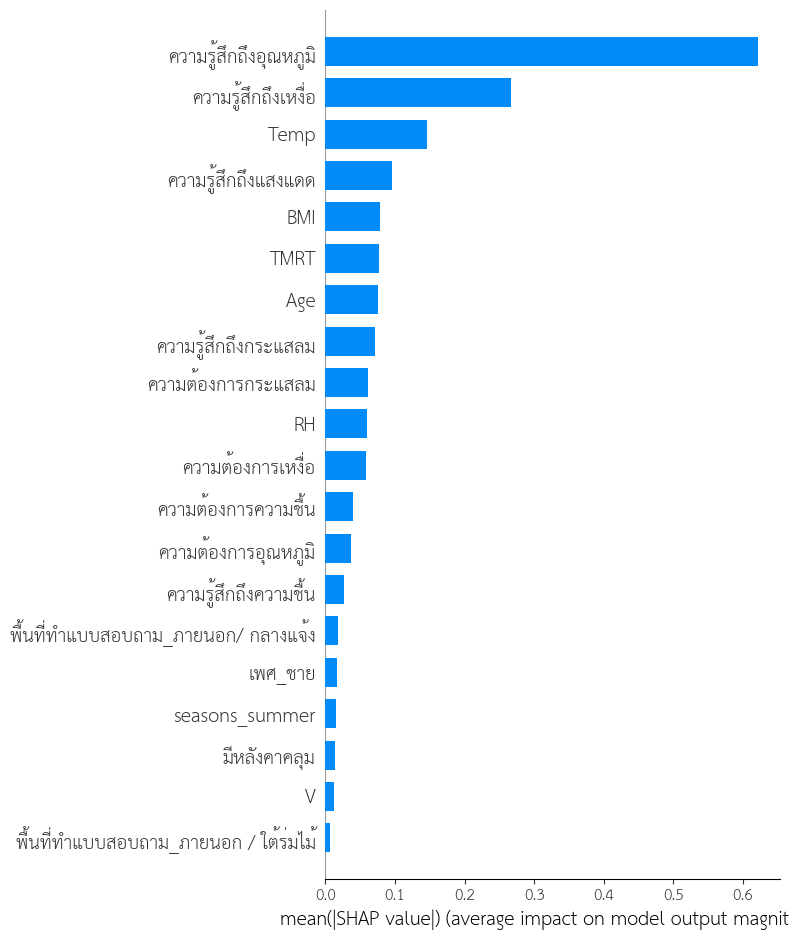

In [ ]:
import shap
# SHAP Interpreter
shapExplainer = shap.TreeExplainer(result)
shapValues = shapExplainer.shap_values(X_train_res)

# Explainer details
shapExplainer.__dict__

# Summary features contribute in model
shap.summary_plot(shapValues, X_train_res, plot_type = 'bar')

In [ ]:
shapExplainer = shap.TreeExplainer(result)
shapValues = shapExplainer.shap_values(X_train_res)

# Explainer details
shapExplainer.__dict__

# Summary features contribute in model
shap.summary_plot(shapValues, X_train_res.values, classnames = class_names, feature_names = X_train_res.values)

NameError: name 'class_names' is not defined

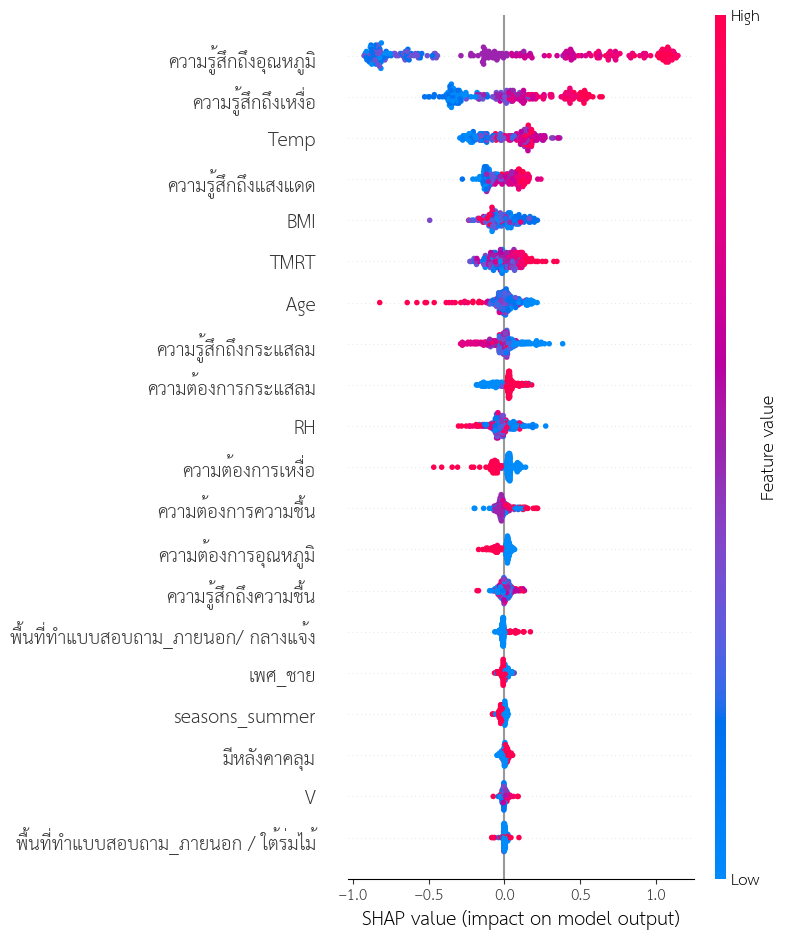

In [ ]:
shap.summary_plot(shapValues, X_train_res)

In [ ]:
shap.summary_plot(shapValues, X_train_res)

In [ ]:
for name in X_train_res.columns:
    shap.dependence_plot(name, shap_values, X_train_res, feature_names = X_train_res.columns)

NameError: name 'shap_values' is not defined

###PDP

<Axes: >

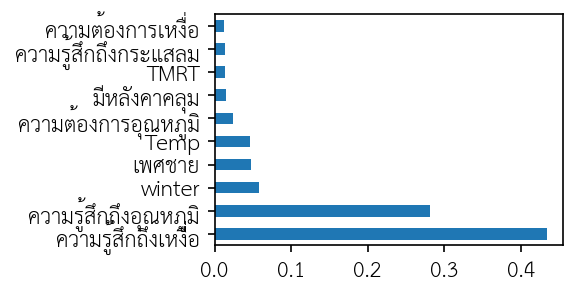

In [ ]:
fig, ax = plt.subplots(figsize=(3, 2), dpi=150)
pd.Series(result.feature_importances_, index=X_train_res.columns)\
    .nlargest(10)\
    .plot(kind='barh', ax=ax)

In [ ]:
base_features = ['ความรู้สึกถึงเหงื่อ', 'ความรู้สึกถึงอุณหภูมิ', 'Temp']

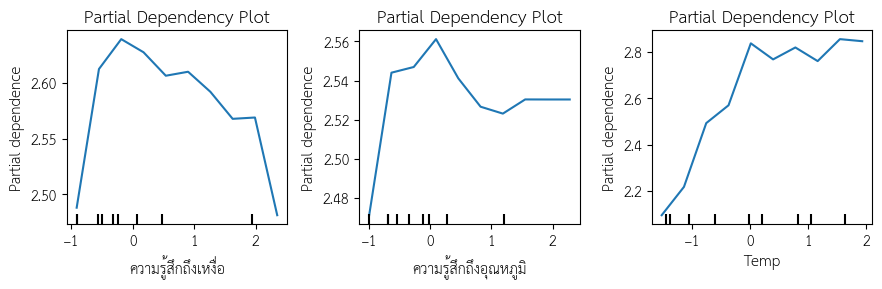

In [ ]:
n_cols = len(base_features)  # จำนวนคอลัมน์ตามจำนวน features
fig, axs = plt.subplots(nrows=1, ncols=n_cols, figsize=(n_cols * 3, 3))  # ปรับขนาดให้เหมาะสม

for i, bf in enumerate(base_features):
    PartialDependenceDisplay.from_estimator(
        result,
        X_train_res,
        features=[bf],
        feature_names=base_features,
        grid_resolution = 10,
        ax=axs[i]  # ใช้ axis ที่ i
    )
    axs[i].set_title("Partial Dependency Plot")

plt.tight_layout()
plt.show()

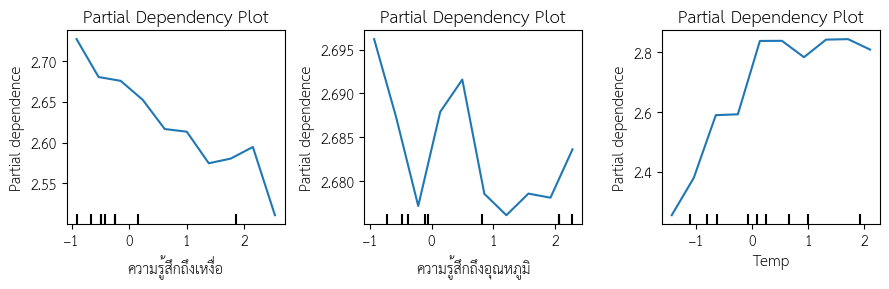

In [ ]:
n_cols = len(base_features)  # จำนวนคอลัมน์ตามจำนวน features
fig, axs = plt.subplots(nrows=1, ncols=n_cols, figsize=(n_cols * 3, 3))  # ปรับขนาดให้เหมาะสม

for i, bf in enumerate(base_features):
    PartialDependenceDisplay.from_estimator(
        result,
        X_test_scaled,
        features=[bf],
        feature_names=base_features,
        grid_resolution = 10,
        ax=axs[i]  # ใช้ axis ที่ i
    )
    axs[i].set_title("Partial Dependency Plot")

plt.tight_layout()
plt.show()

##Regression

In [ ]:
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet

# mean_squared_error module for applying RMSE
from sklearn.metrics import mean_squared_error as mse

###Lasso

###TSV 7 ค่า

In [ ]:
from sklearn.linear_model import LassoCV

# Create an instance of Lasso Regression implementation
lasso_cv = LassoCV(cv=kfold)

# Fit the Lasso model
lasso_cv.fit(X_train_res, y2_train_res)

LassoCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True))

In [ ]:
# Define parameter grid
param_grid = {
    'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10],
    'max_iter': [1, 5, 10, 50, 100, 500, 1000, 2000],
    'tol': [1e-1, 1e-2, 1e-3, 1e-4, 1e-5],
    'selection': ['cyclic', 'random']  # วิธีการเลือกฟีเจอร์ขณะทำการฝึกโมเดล
}

# Perform grid search with cross-validation
lasso_cv = GridSearchCV(Lasso(), param_grid, cv=kfold)
lasso_cv.fit(X_train_res, y2_train_res)

# Print best parameter values and score
print("Best Parameters:", lasso_cv.best_params_)
print("Best Score:", lasso_cv.best_score_)

Best Parameters: {'alpha': 0.01, 'max_iter': 5, 'selection': 'random', 'tol': 0.01}
Best Score: 0.8454530542950816


In [ ]:
print("Best parameters :", lasso_cv.best_params_)
print("Best accuracy :", lasso_cv.best_score_)
print('R_Square:', format(lasso_cv.best_score_))
print('Best parameters:', format(lasso_cv.best_params_))

Best parameters : {'alpha': 0.01, 'max_iter': 5, 'selection': 'random', 'tol': 0.01}
Best accuracy : 0.8454530542950816
R_Square: 0.8454530542950816
Best parameters: {'alpha': 0.01, 'max_iter': 5, 'selection': 'random', 'tol': 0.01}


In [ ]:
# Fit Lasso regression model
lasso = Lasso(alpha = 0.01, max_iter = 5, selection = 'random', tol = 0.01)
lasso_reg = lasso.fit(X_train_res, y2_train_res)

# Evaluate model performance on test set
y_pred = lasso.predict(X_test_scaled)

# Model Score
print("Model Score: ", lasso.score(X_test_scaled, y2_test))

# Lasso Coefficient
lasso.coef_

print('MSE_train: {:.15f}'. format(mean_squared_error(y2_train_res, lasso_reg.predict(X_train_res))))
print('MSE_test: {:.15f}'. format(mean_squared_error(y2_test, lasso_reg.predict(X_test_scaled))))

print('MAE_train: {:.15f}'. format(mean_absolute_error(y2_train_res, lasso_reg.predict(X_train_res))))
print('MAE_test: {:.15f}'. format(mean_absolute_error(y2_test, lasso_reg.predict(X_test_scaled))))

print("R-squared Score_train:", format(r2_score(y2_train_res, lasso_reg.predict(X_train_res))))
print("R-squared Score_test:", format(r2_score(y2_test, lasso_reg.predict(X_test_scaled))))

Model Score:  0.512853885600181
MSE_train: 0.302353112665267
MSE_test: 0.673962557102452
MAE_train: 0.417414510508491
MAE_test: 0.587495633475442
R-squared Score_train: 0.8488234436673665
R-squared Score_test: 0.512853885600181


In [ ]:
# Fit Lasso regression model
lasso = Lasso(alpha=0.001)
lasso_reg = lasso.fit(X_train_res, y2_train_res)

# Evaluate model performance on test set
y_pred = lasso.predict(X_test_scaled)

# Model Score
print("Model Score: ", lasso.score(X_test_scaled, y2_test))

# Lasso Coefficient
lasso.coef_

print('MSE_train: {:.15f}'. format(mean_squared_error(y2_train_res, lasso_reg.predict(X_train_res))))
print('MSE_test: {:.15f}'. format(mean_squared_error(y2_test, lasso_reg.predict(X_test_scaled))))

print('MAE_train: {:.15f}'. format(mean_absolute_error(y2_train_res, lasso_reg.predict(X_train_res))))
print('MAE_test: {:.15f}'. format(mean_absolute_error(y2_test, lasso_reg.predict(X_test_scaled))))

print("R-squared Score_train:", format(r2_score(y2_train_res, lasso_reg.predict(X_train_res))))
print("R-squared Score_test:", format(r2_score(y2_test, lasso_reg.predict(X_test_scaled))))

Model Score:  0.4177585343169511
MSE_train: 0.273509474785286
MSE_test: 0.805526176774065
MAE_train: 0.399033355003670
MAE_test: 0.670337814594046
R-squared Score_train: 0.8632452626073568
R-squared Score_test: 0.4177585343169511


In [ ]:
# กำหนดค่า hyperparameters ที่ต้องการทดสอบ
param_grid = {
    'alpha': [0.001, 0.01, 0.1, 1, 10],
    'max_iter': [100, 500, 1000, 2000, 3000],
    'tol': [1e-3, 1e-4, 1e-5],
    'selection': ['cyclic', 'random']  # วิธีการเลือกฟีเจอร์ขณะทำการฝึกโมเดล
}

# ใช้ GridSearchCV
grid_search = GridSearchCV(Lasso(), param_grid, cv=kfold)
grid_search.fit(X_train_res, y2_train_res)

# หรือใช้ RandomizedSearchCV
# randomized_search = RandomizedSearchCV(Lasso(), param_distributions=param_grid, n_iter=10, cv=5)
# randomized_search.fit(X_train, y_train)

# แสดงค่า hyperparameters ที่ดีที่สุด
print("Best hyperparameters found using GridSearchCV:")
print(grid_search.best_params_)

# ทดสอบโมเดลที่ดีที่สุดบนชุดข้อมูล Test
best_model = grid_search.best_estimator_
# best_model = randomized_search.best_estimator_
r2_score = best_model.score(X_test_scaled, y2_test)
print("R-squared score on test set:", r2_score)

Best hyperparameters found using GridSearchCV:
{'alpha': 0.01, 'max_iter': 1000, 'selection': 'random', 'tol': 0.001}
R-squared score on test set: 0.45666143057079744


In [ ]:
# Fit Lasso regression model
lasso = Lasso(alpha = 0.01, max_iter = 1000, tol = 0.001, selection = 'random')
lasso_reg = lasso.fit(X_train_res, y2_train_res)

# Evaluate model performance on test set
y_pred = lasso.predict(X_test_scaled)

# Model Score
print("Model Score: ", lasso.score(X_test_scaled, y2_test))

# Lasso Coefficient
lasso.coef_

print('MSE_train: {:.15f}'. format(mean_squared_error(y2_train_res, lasso_reg.predict(X_train_res))))
print('MSE_test: {:.15f}'. format(mean_squared_error(y2_test, lasso_reg.predict(X_test_scaled))))

print('MAE_train: {:.15f}'. format(mean_absolute_error(y2_train_res, lasso_reg.predict(X_train_res))))
print('MAE_test: {:.15f}'. format(mean_absolute_error(y2_test, lasso_reg.predict(X_test_scaled))))

Model Score:  0.4564899812578216
MSE_train: 0.278037390368868
MSE_test: 0.751941545286841
MAE_train: 0.403889161977218
MAE_test: 0.638360746587344


###SHAP

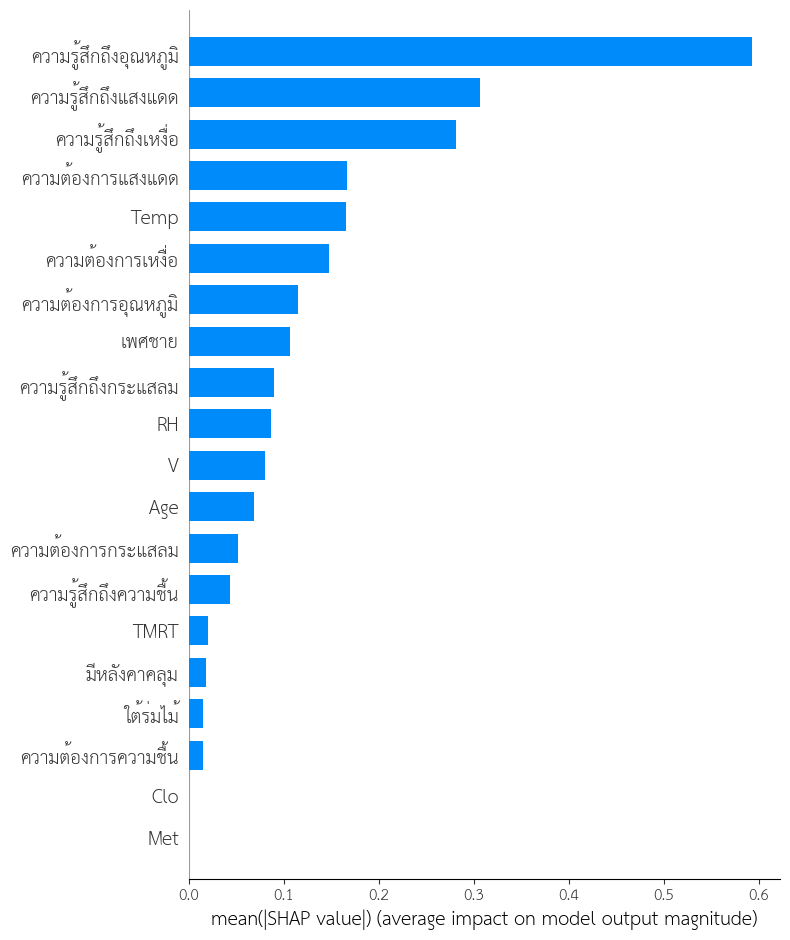

In [ ]:
masker = shap.maskers.Independent(data = X_train_res)
# SHAP Interpreter
shapExplainer = shap.LinearExplainer(lasso_reg,masker=masker)
shapValues = shapExplainer.shap_values(X_train_res)

# Explainer details
shapExplainer.__dict__

# Summary features contribute in model
#shap.summary_plot(shapValues, X_train_res, plot_type = 'bar')
class_names = [0,1]
shap.summary_plot(shapValues, X_train_res.values, plot_type = 'bar', class_names= class_names, feature_names = X_train_res.columns)

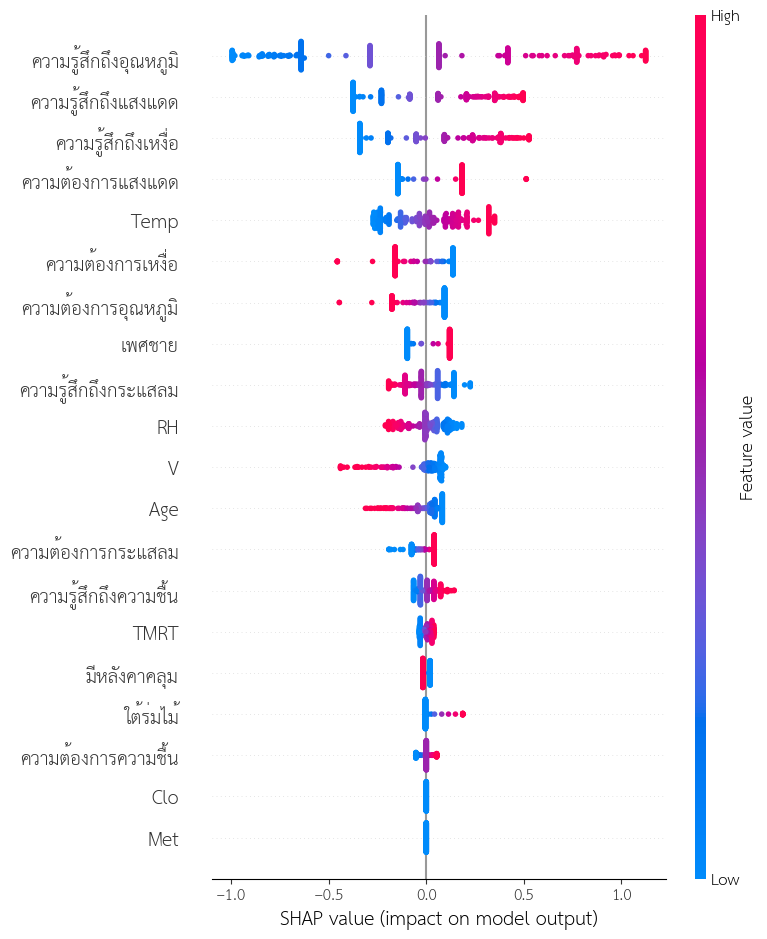

In [ ]:
shap.summary_plot(shapValues, X_train_res)

###PDP

In [ ]:
from yellowbrick.model_selection import FeatureImportances

viz = FeatureImportances(lasso_reg)
viz.fit(X, y2)
viz.show()

In [ ]:
base_features = ['อุณหภูมิ', 'ความแรงของแสงแดด', 'ความร้อน']

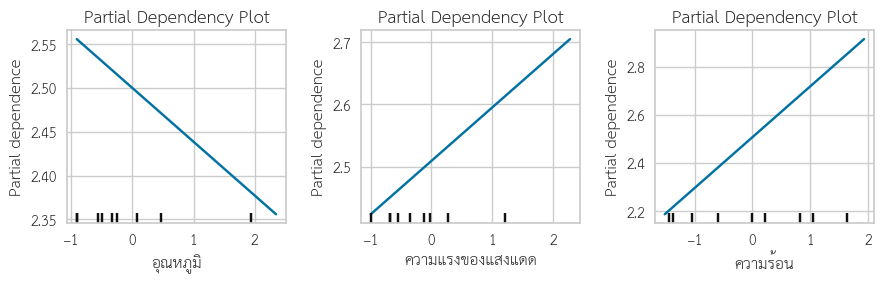

In [ ]:
n_cols = len(base_features)  # จำนวนคอลัมน์ตามจำนวน features
fig, axs = plt.subplots(nrows=1, ncols=n_cols, figsize=(n_cols * 3, 3))  # ปรับขนาดให้เหมาะสม

for i, bf in enumerate(base_features):
    PartialDependenceDisplay.from_estimator(
        lasso_reg,
        X_train_res,
        features=[bf],
        feature_names=base_features,
        grid_resolution = 10,
        ax=axs[i]  # ใช้ axis ที่ i
    )
    axs[i].set_title("Partial Dependency Plot")

plt.tight_layout()
plt.show()

##Random Forest

In [ ]:
import os
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

###TSV 7 ค่า

In [ ]:
parameters = {
    'n_estimators': [50, 100, 150, 200, 250, 300],
    'max_features': ['auto', 'sqrt', 'log2'],  # เพิ่ม None เพื่อให้สุ่ม feature ทุกครั้ง
    'max_depth': [3, 4, 5, 6, 7, 8],      # เพิ่ม None เพื่อให้ไม่จำกัดความลึกของต้นไม้
    'min_samples_split': [2, 5, 10],         # เพิ่ม min_samples_split เพื่อความหลากหลาย
    'min_samples_leaf': [1, 3, 5]             # เพิ่ม min_samples_leaf เพื่อความหลากหลาย
}

#    'min_samples_split': [2, 5, 10],         # เพิ่ม min_samples_split เพื่อความหลากหลาย
#    'min_samples_leaf': [1, 3, 5]             # เพิ่ม min_samples_leaf เพื่อความหลากหลาย
regr = RandomForestRegressor(random_state=0)

clf = GridSearchCV(regr, parameters, cv = kfold)
clf.fit(X_train_res, y2_train_res)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=RandomForestRegressor(random_state=0),
             param_grid={'max_depth': [3, 4, 5, 6, 7, 8],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 3, 5],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 150, 200, 250, 300]})

In [ ]:
print("Best accuracy :", clf.best_score_)
print("Best parameters :", clf.best_params_)

Best accuracy : 0.8380723566962363
Best parameters : {'max_depth': 8, 'max_features': 'sqrt', 'min_samples_leaf': 3, 'min_samples_split': 5, 'n_estimators': 150}


In [ ]:
rdf_reg = RandomForestRegressor(max_depth = 8, max_features = 'sqrt', min_samples_leaf = 3, min_samples_split = 5, n_estimators = 150)

# Train the model
resultss = rdf_reg.fit(X_train_res, y2_train_res)

# Make predictions on the test set
y_pred = rdf_reg.predict(X_test_scaled)
#print(confusion_matrix(y3_test,y_pred))
#print(classification_report(y3_test,y_pred))
print('MSE_train:', format(mean_squared_error(y2_train_res, resultss.predict(X_train_res))))
print('MSE_test:', format(mean_squared_error(y2_test, resultss.predict(X_test_scaled))))

print('MAE_train:', format(mean_absolute_error(y2_train_res, resultss.predict(X_train_res))))
print('MAE_test:', format(mean_absolute_error(y2_test, resultss.predict(X_test_scaled))))

MSE_train: 0.14696991035891704
MSE_test: 0.48634086474218197
MAE_train: 0.28707573743885134
MAE_test: 0.5654966320097263


In [ ]:
print("Best accuracy :", clf.best_score_)
print("Best parameters :", clf.best_params_)

Best accuracy : 0.8528372598516027
Best parameters : {'max_depth': 8, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


In [ ]:
rdf_reg = RandomForestRegressor(max_depth = 8, max_features = 'sqrt', min_samples_leaf = 1, min_samples_split = 2, n_estimators = 200)

# Train the model
resultss = rdf_reg.fit(X_train_res, y2_train_res)

# Make predictions on the test set
y_pred = rdf_reg.predict(X_test_scaled)
#print(confusion_matrix(y3_test,y_pred))
#print(classification_report(y3_test,y_pred))
print('MSE_train:', format(mean_squared_error(y2_train_res, resultss.predict(X_train_res))))
print('MSE_test:', format(mean_squared_error(y2_test, resultss.predict(X_test_scaled))))

print('MAE_train:', format(mean_absolute_error(y2_train_res, resultss.predict(X_train_res))))
print('MAE_test:', format(mean_absolute_error(y2_test, resultss.predict(X_test_scaled))))

MSE_train: 0.04921010069249847
MSE_test: 0.4850045928607796
MAE_train: 0.1638224811000187
MAE_test: 0.5630549442359931


In [ ]:
rdf_reg = RandomForestRegressor(max_depth = 8, max_features = 'sqrt', min_samples_leaf = 1, min_samples_split = 2, n_estimators = 200)

# Train the model
resultss = rdf_reg.fit(X_train_res, y2_train_res)

# Make predictions on the test set
y_pred = rdf_reg.predict(X_test_scaled)
#print(confusion_matrix(y3_test,y_pred))
#print(classification_report(y3_test,y_pred))
print('MSE_train:', format(mean_squared_error(y2_train_res, resultss.predict(X_train_res))))
print('MSE_test:', format(mean_squared_error(y2_test, resultss.predict(X_test_scaled))))

print('MAE_train:', format(mean_absolute_error(y2_train_res, resultss.predict(X_train_res))))
print('MAE_test:', format(mean_absolute_error(y2_test, resultss.predict(X_test_scaled))))

In [ ]:
print("R-squared Score_train:", format(r2_score(y2_train_res, resultss.predict(X_train_res))))
print("R-squared Score_test:", format(r2_score(y2_test, resultss.predict(X_test_scaled))))

###Plot Random Forest

In [ ]:
!pip install dtreeviz
!apt-get install graphviz

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.8/91.8 kB 2.6 MB/s eta 0:00:00
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
graphviz is already the newest version (2.42.2-6).
0 upgraded, 0 newly installed, 0 to remove and 32 not upgraded.


In [ ]:
import dtreeviz # will be used for tree visualization

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn import tree
#from dtreeviz.trees import dtreeviz # will be used for tree visualization
from matplotlib import pyplot as plt
plt.rcParams.update({'figure.figsize': (12.0, 8.0)})
plt.rcParams.update({'font.size': 14})

TSV 7 ค่า

In [ ]:
rdf_reg = RandomForestRegressor(max_depth = 3, max_features = 'auto', n_estimators = 100)

# Train the model
resultss = rdf_reg.fit(X_train_res, y2_train_res)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.


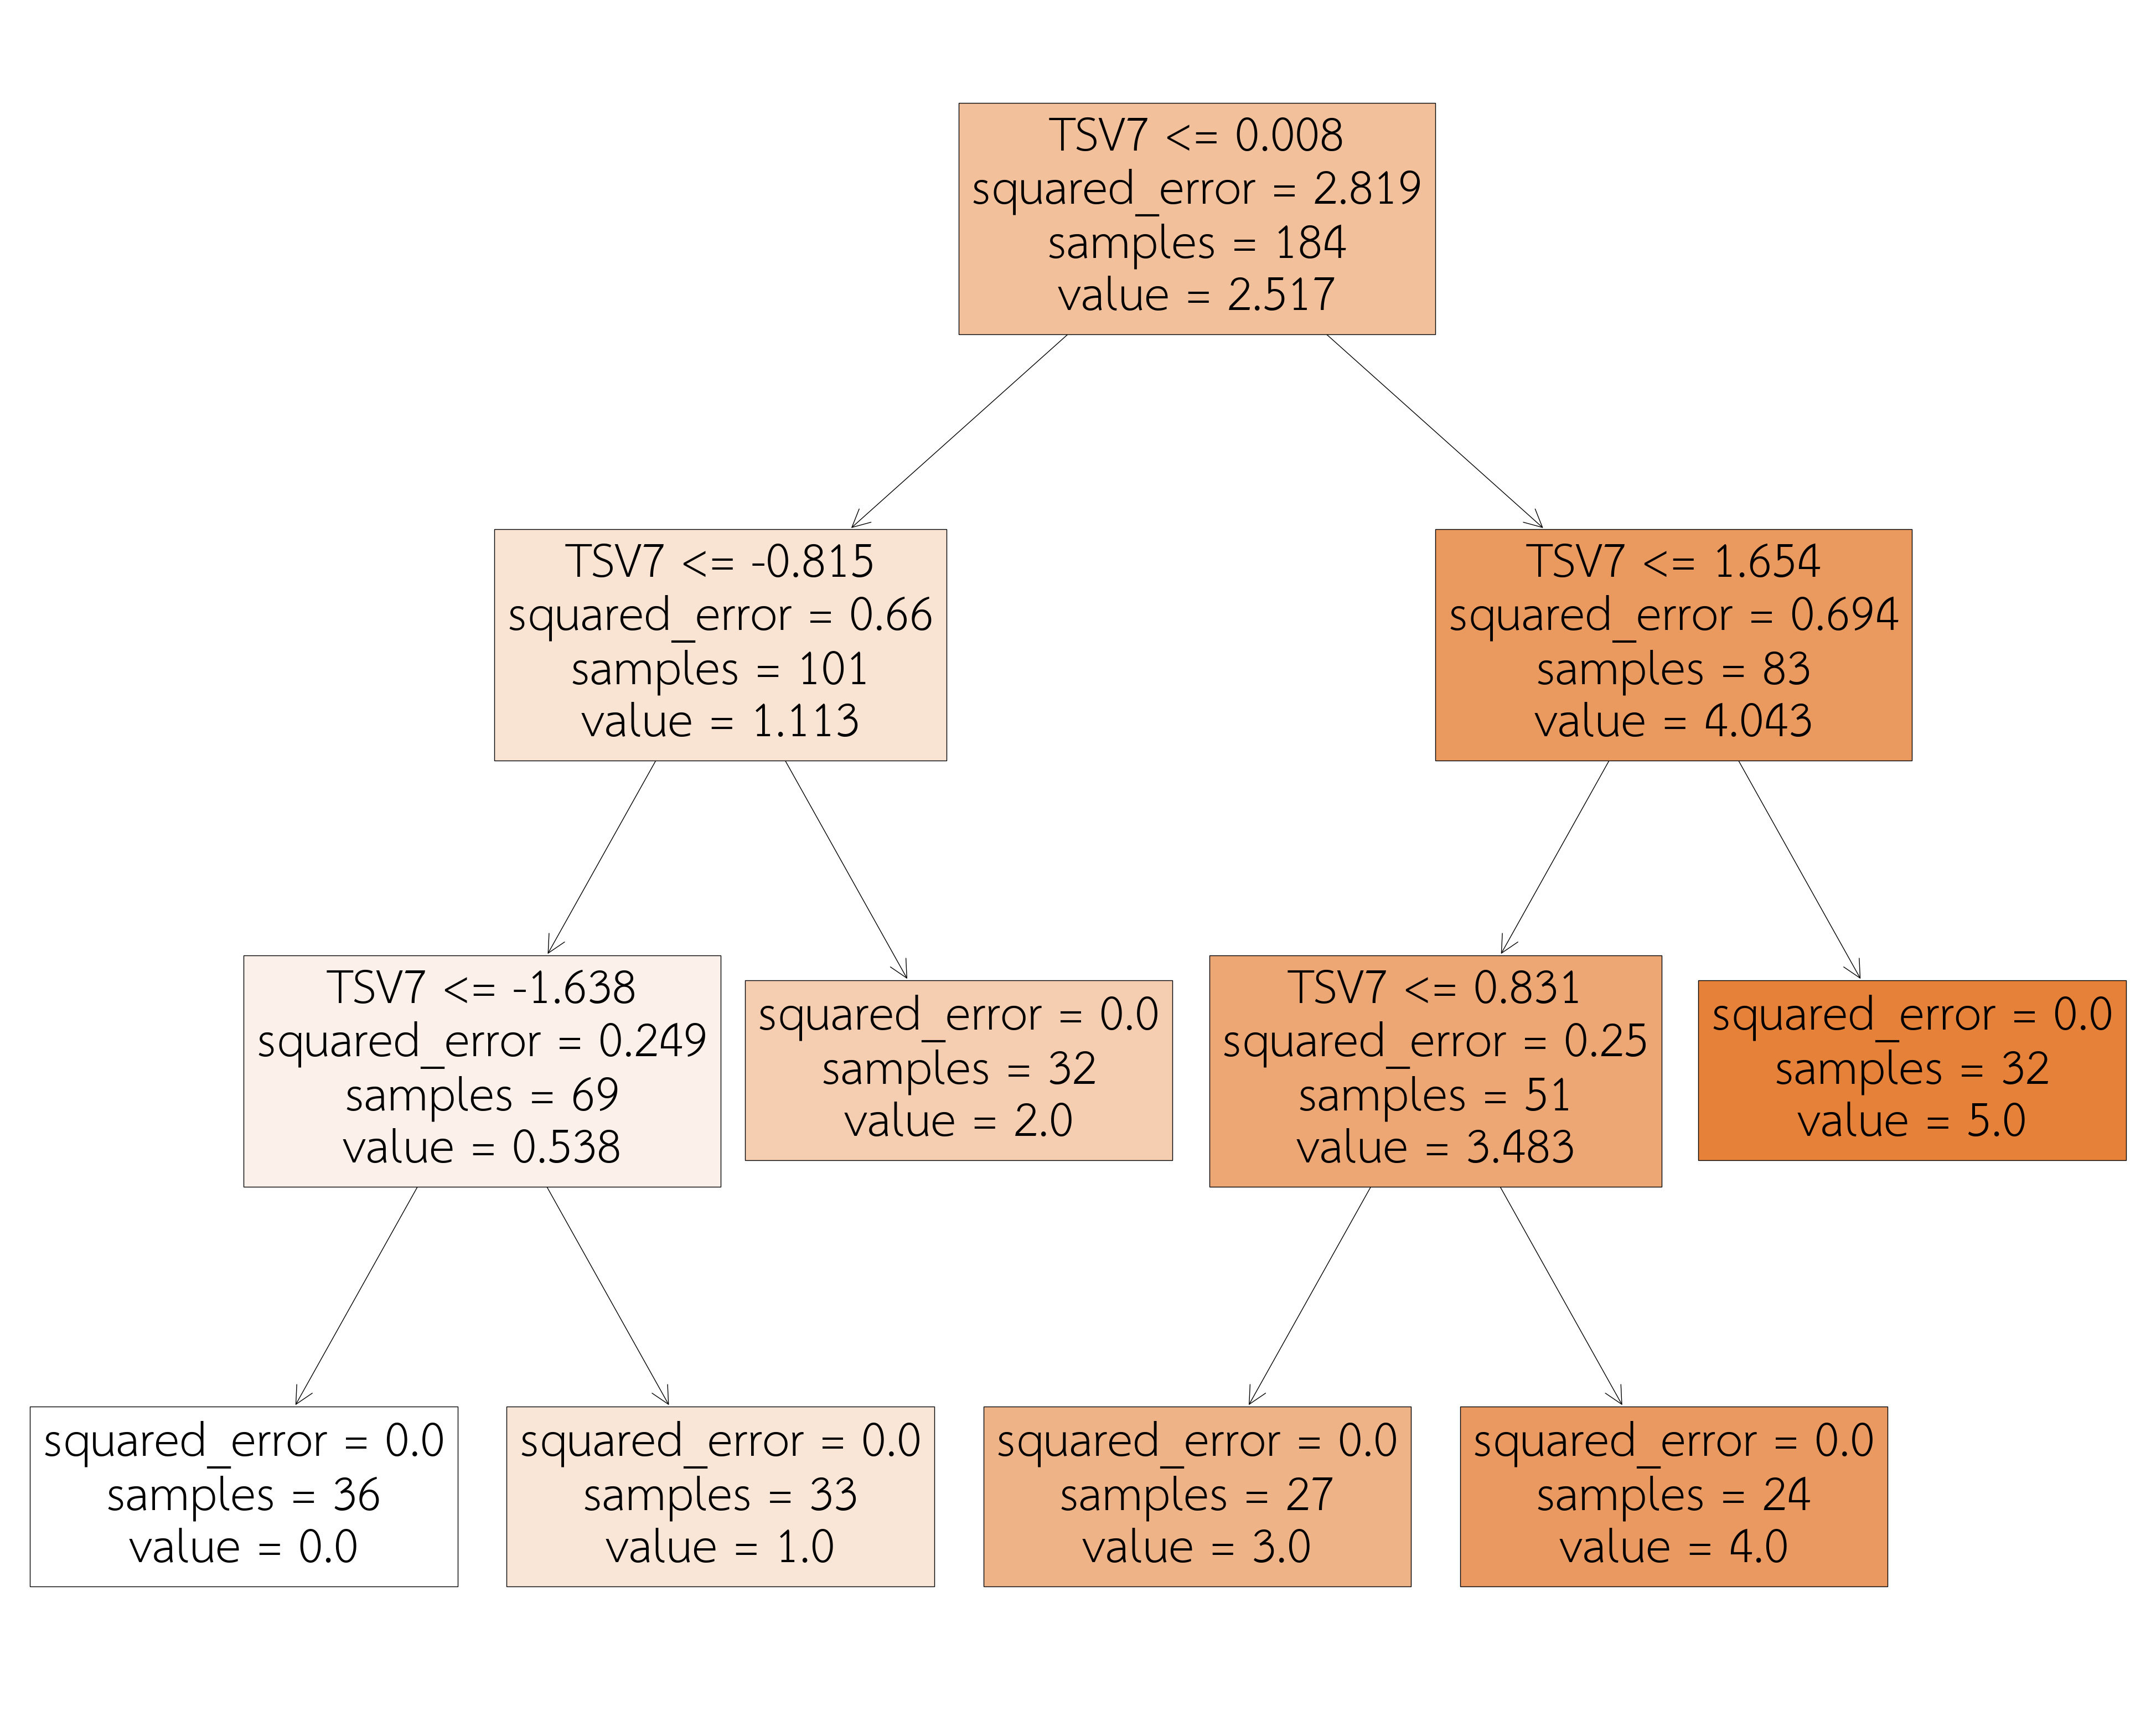

In [ ]:
plt.figure(figsize=(50,40))
_ = tree.plot_tree(rdf_reg.estimators_[0], feature_names=X.columns, filled=True)

###SHAP

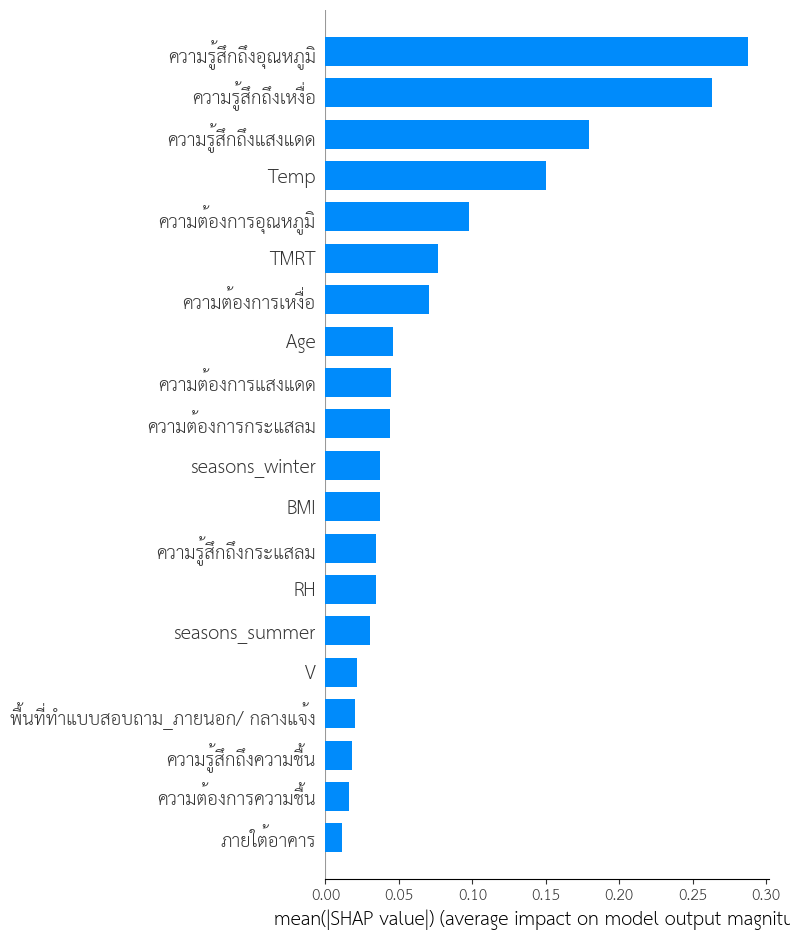

In [81]:
# SHAP Interpreter
shapExplainer = shap.TreeExplainer(resultss)
shapValues = shapExplainer.shap_values(X_test_scaled)

# Explainer details
shapExplainer.__dict__

# Summary features contribute in model
shap.summary_plot(shapValues, X_test_scaled, plot_type = 'bar')

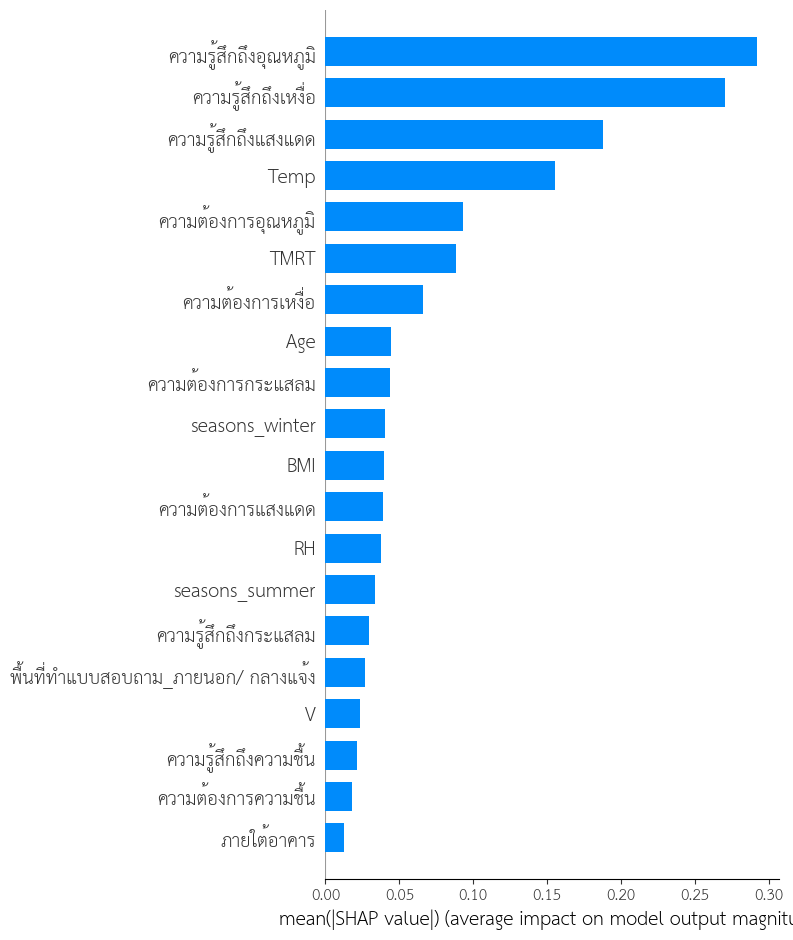

In [82]:
# SHAP Interpreter
shapExplainer = shap.TreeExplainer(resultss)
shapValues = shapExplainer.shap_values(X_train_res)

# Explainer details
shapExplainer.__dict__

# Summary features contribute in model
shap.summary_plot(shapValues, X_train_res, plot_type = 'bar')

In [84]:
class_names = [0,1]

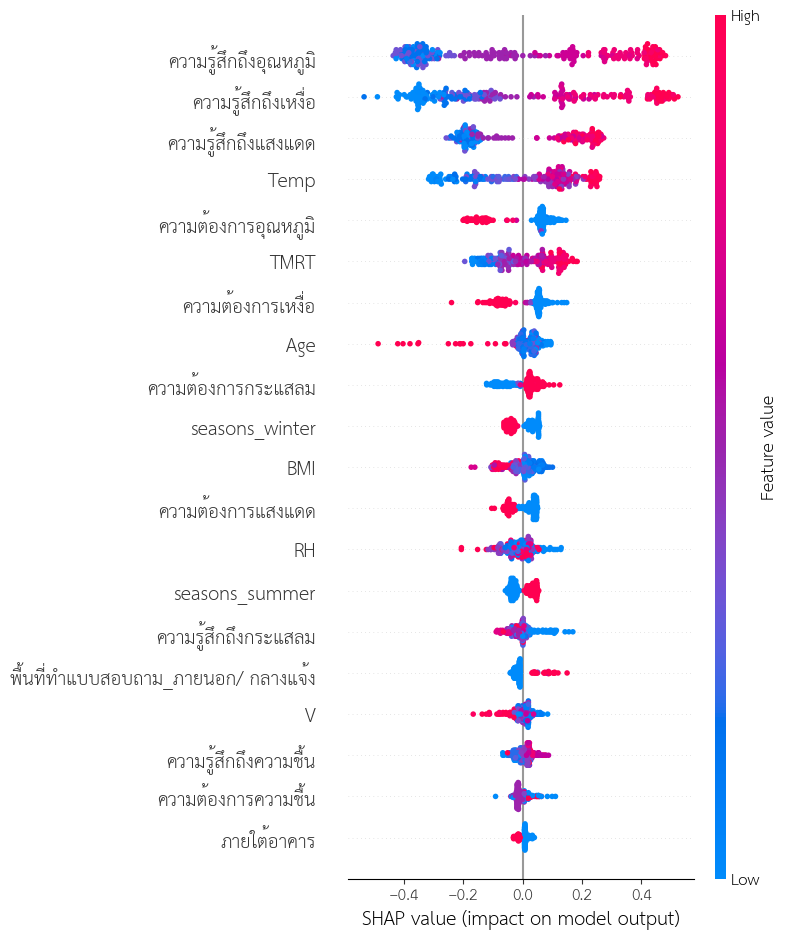

In [93]:
shapExplainer = shap.TreeExplainer(resultss)
shapValues = shapExplainer.shap_values(X_train_res)

# Explainer details
shapExplainer.__dict__

# Summary features contribute in model
shap.summary_plot(shapValues, X_train_res.values, class_names = class_names, feature_names = X_train_res.columns)

In [86]:
shapValues.shape

(240, 26)

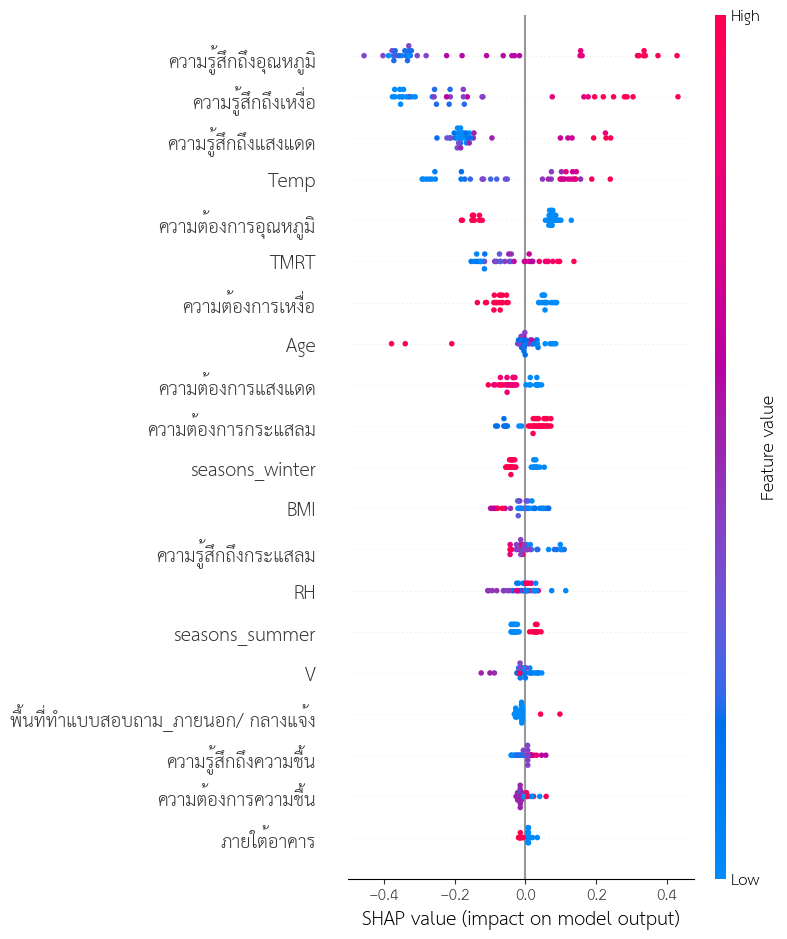

In [87]:
# SHAP Interpreter
shapExplainer = shap.TreeExplainer(resultss)
shapValues = shapExplainer.shap_values(X_test_scaled)

# Explainer details
shapExplainer.__dict__

# Summary features contribute in model
shap.summary_plot(shapValues, X_test_scaled.values, class_names = class_names, feature_names = X_test_scaled.columns)

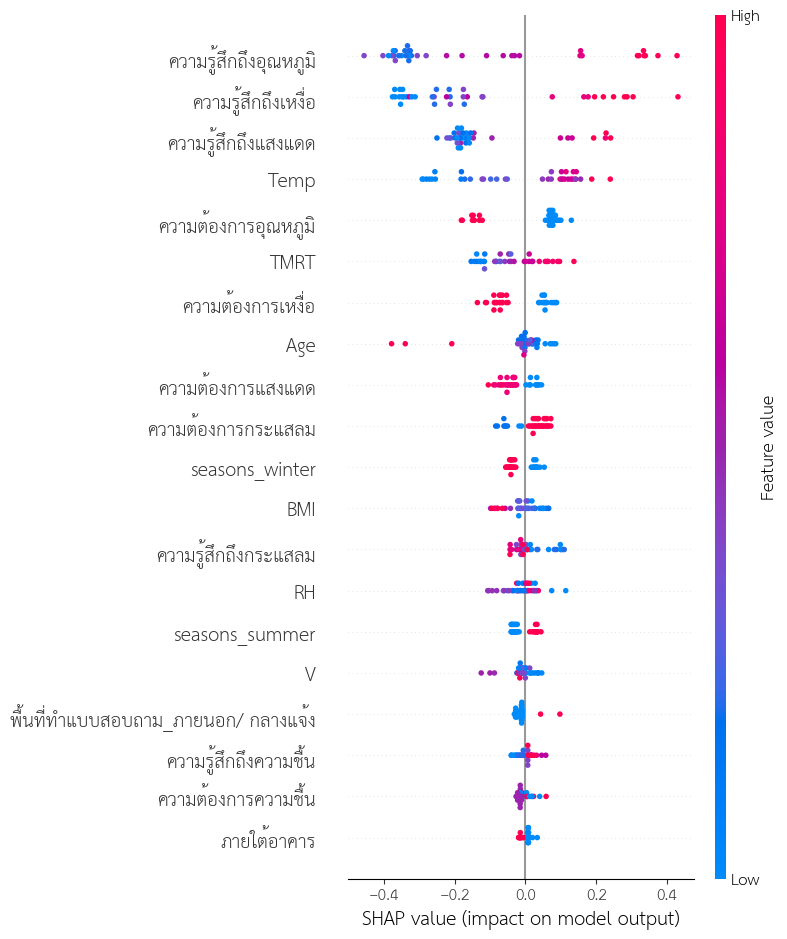

In [88]:
shap.summary_plot(shapValues, X_test_scaled)

In [89]:
shapValues.shape

(37, 26)

In [90]:
X_train_res.shape

(240, 26)

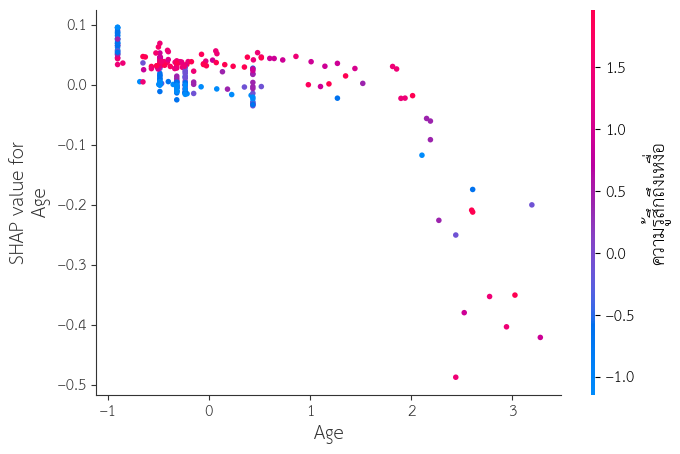

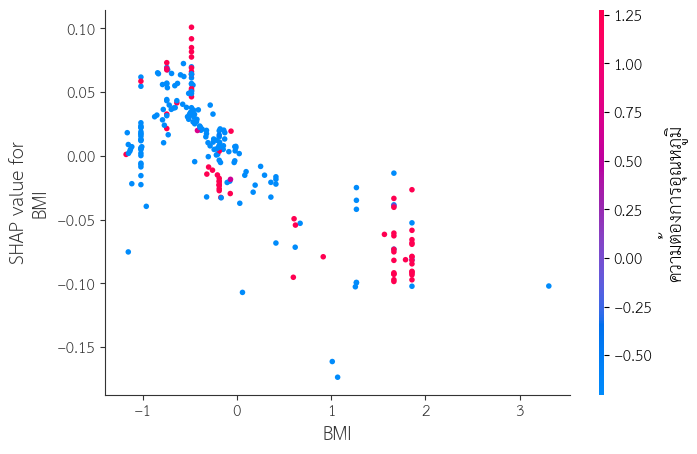

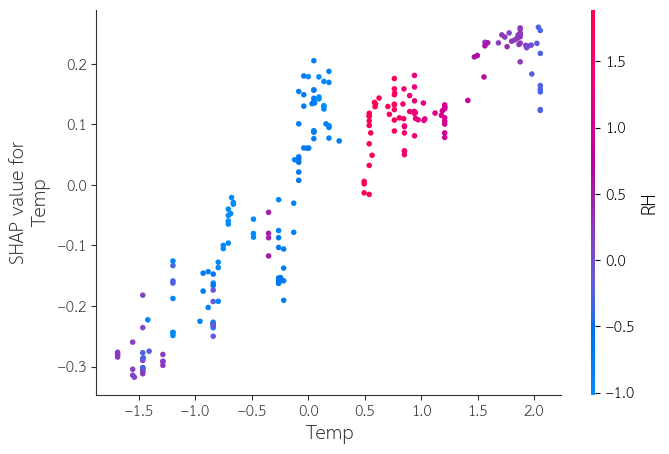

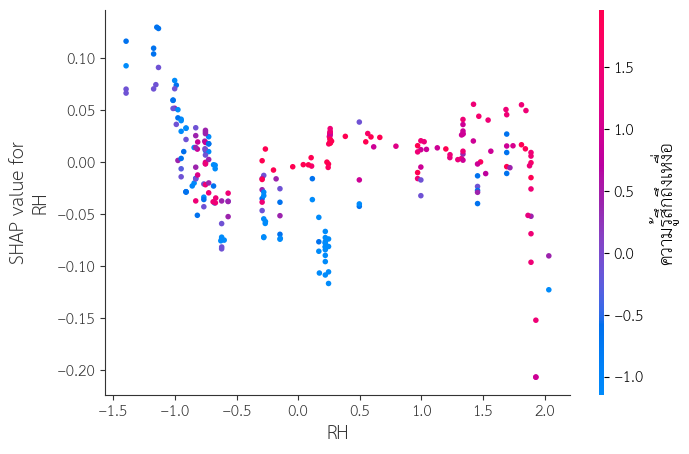

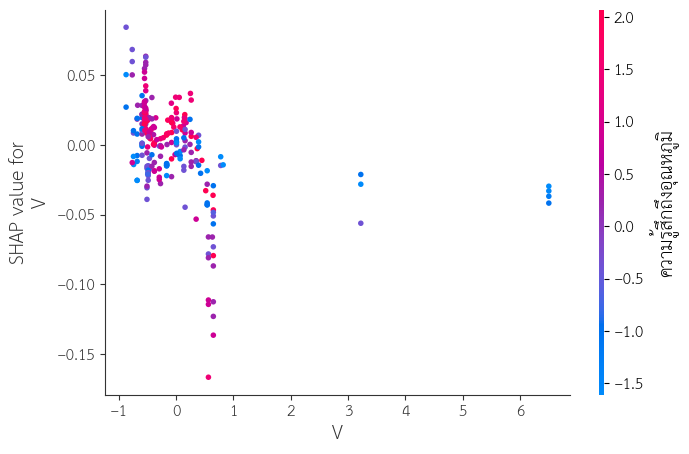

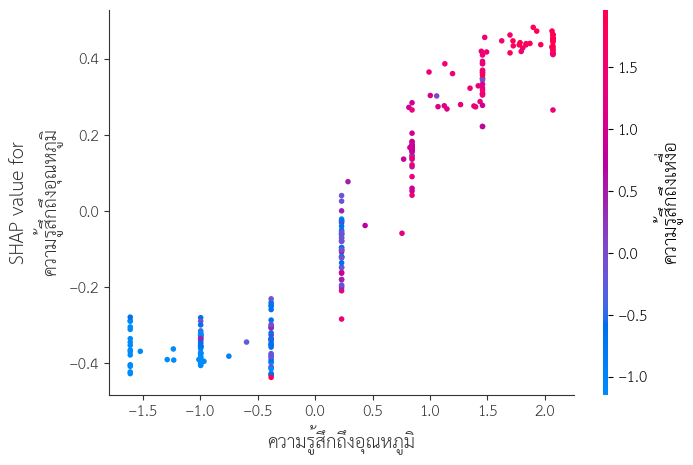

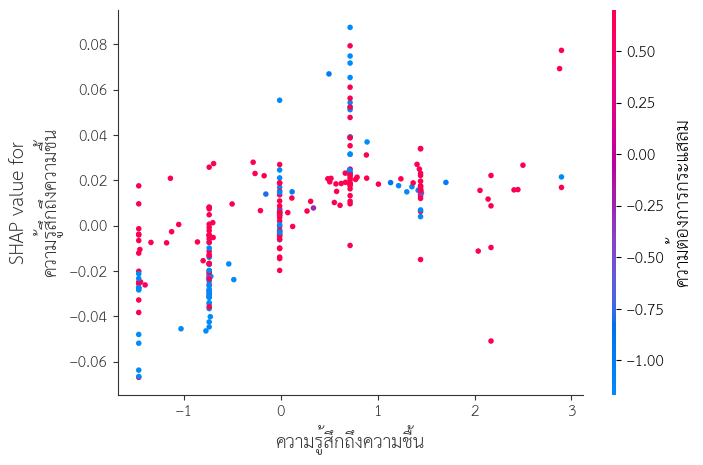

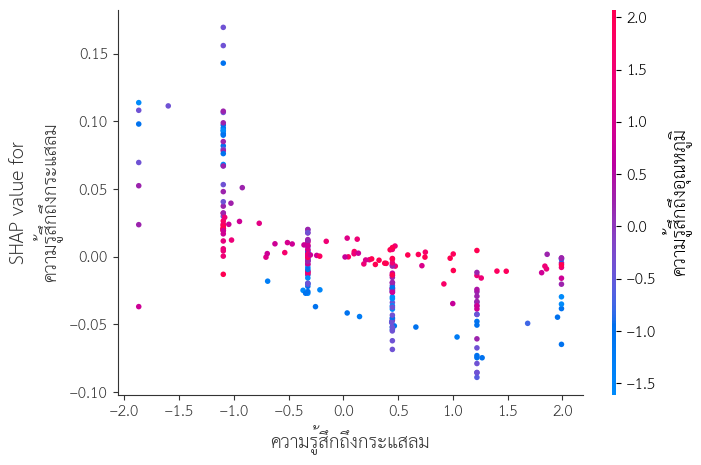

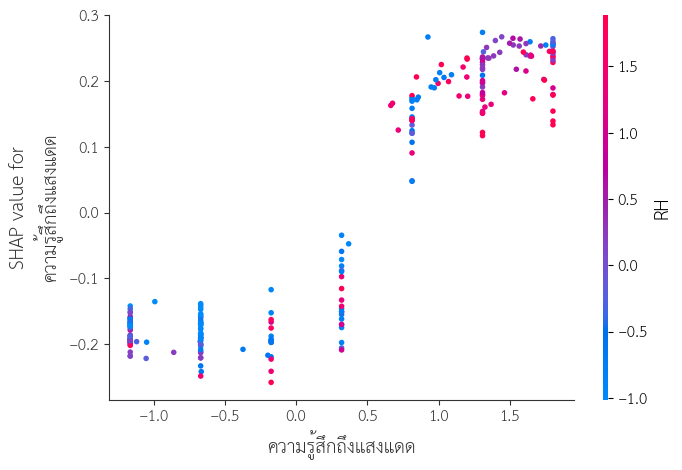

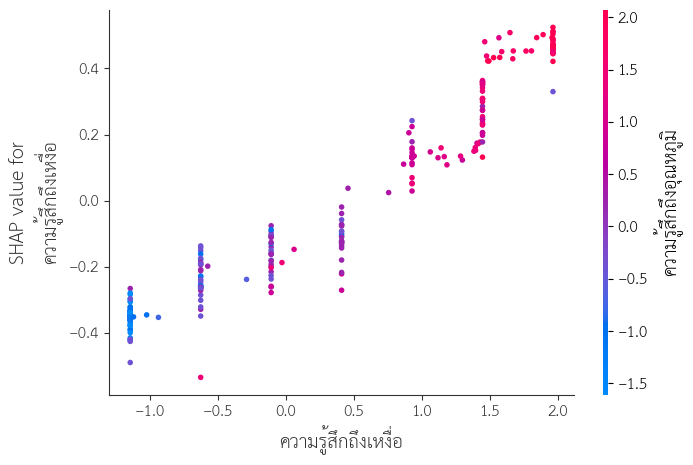

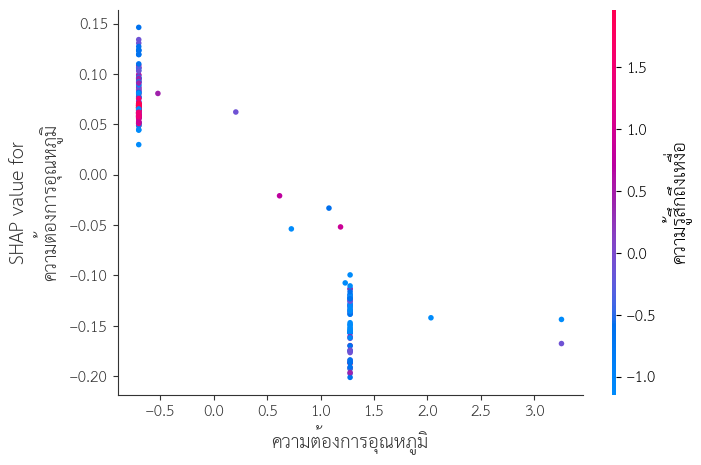

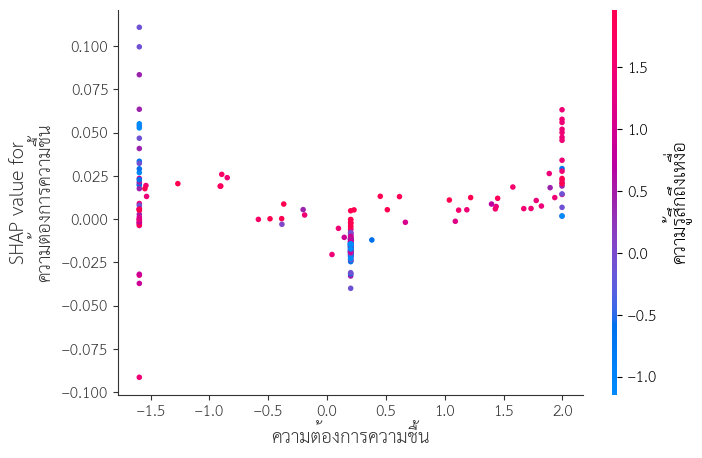

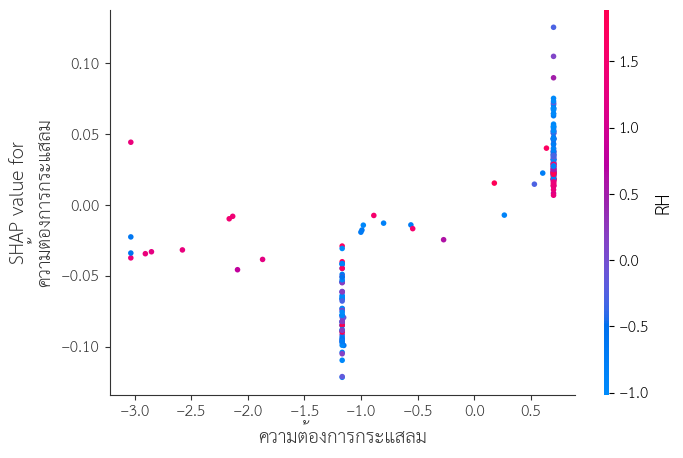

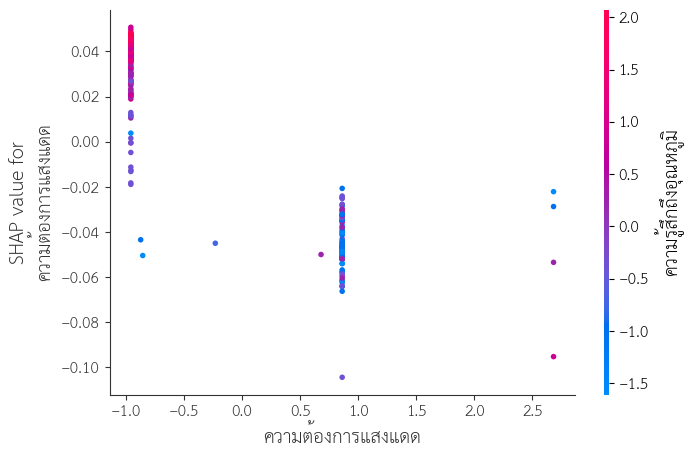

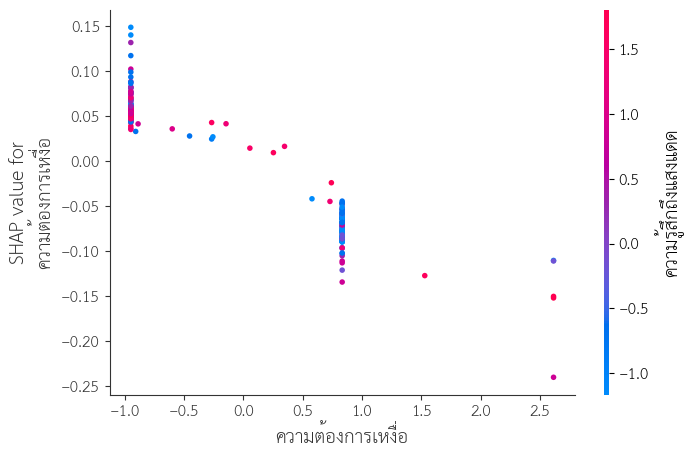

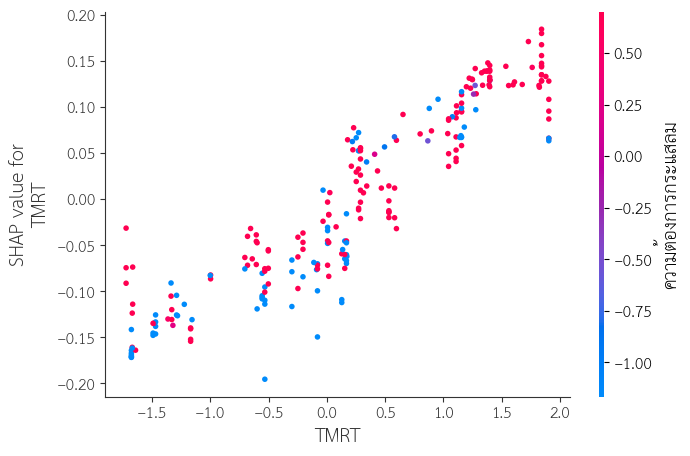

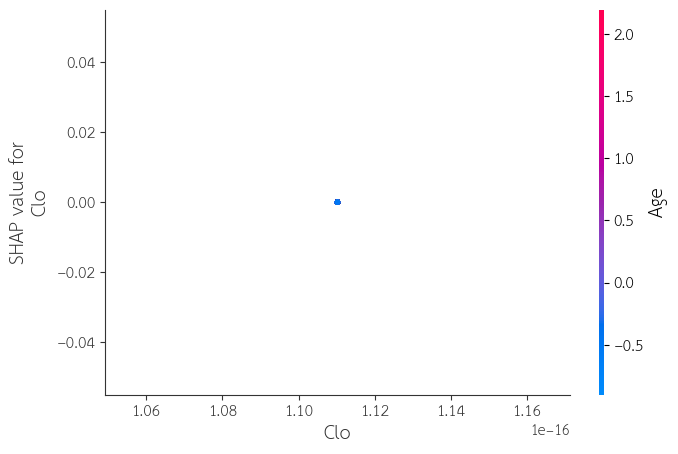

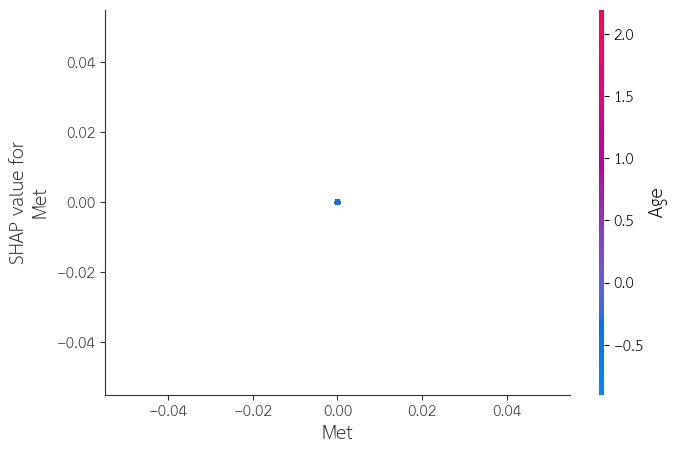

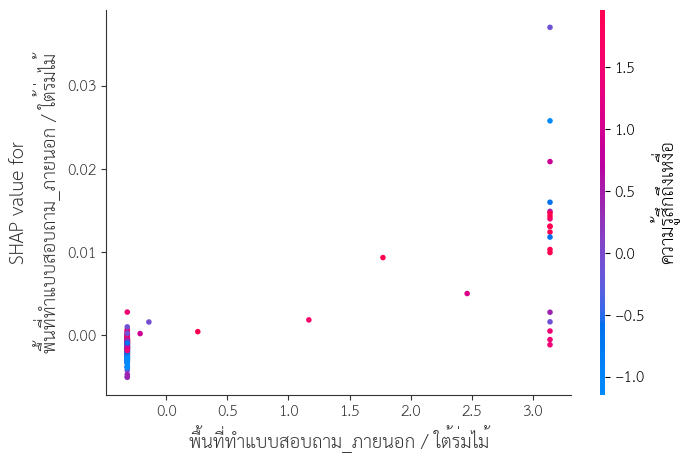

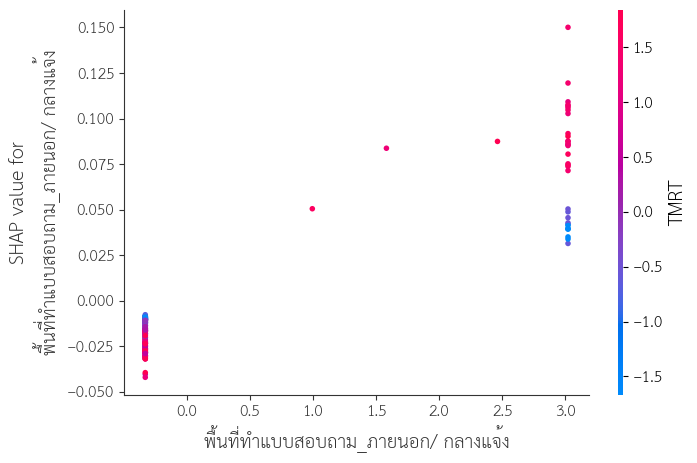

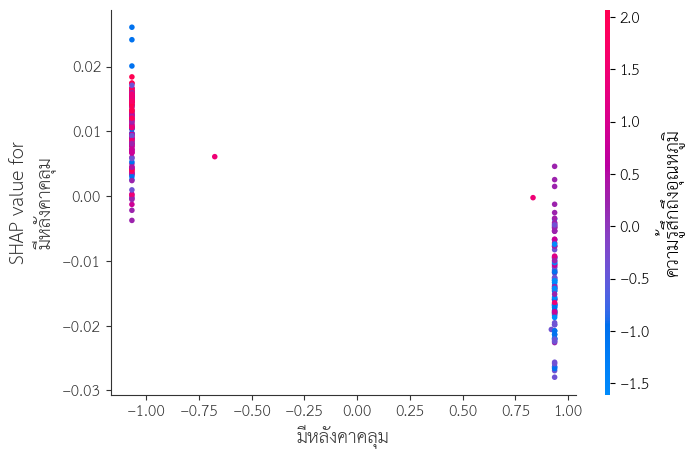

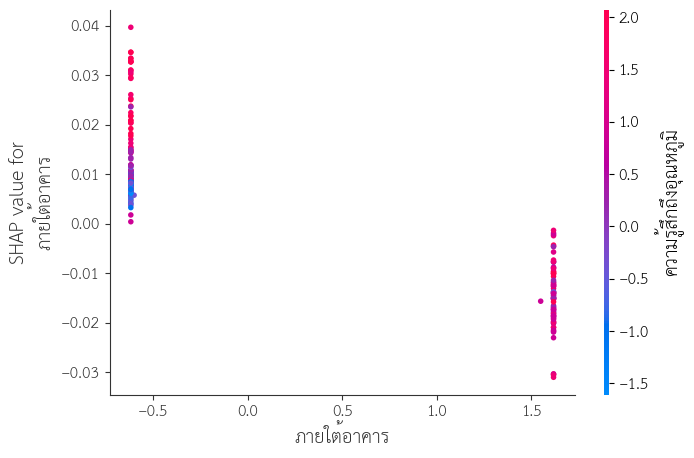

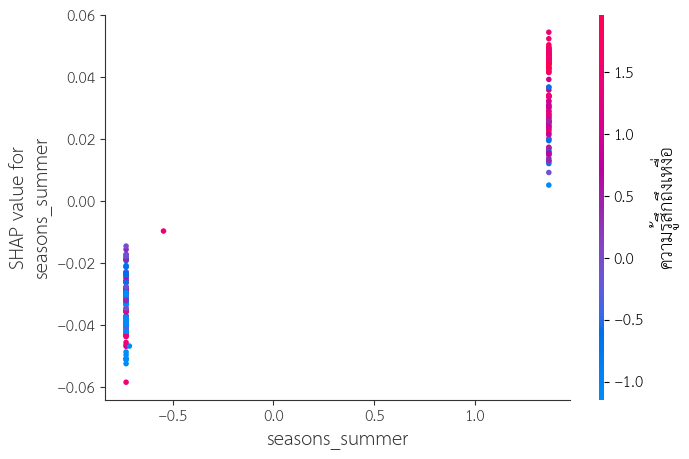

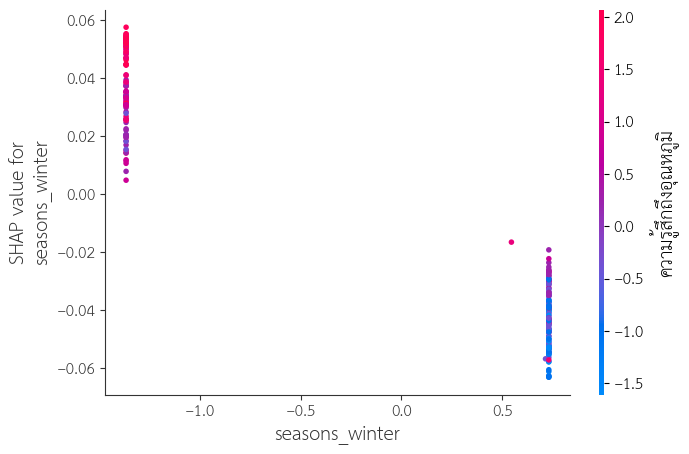

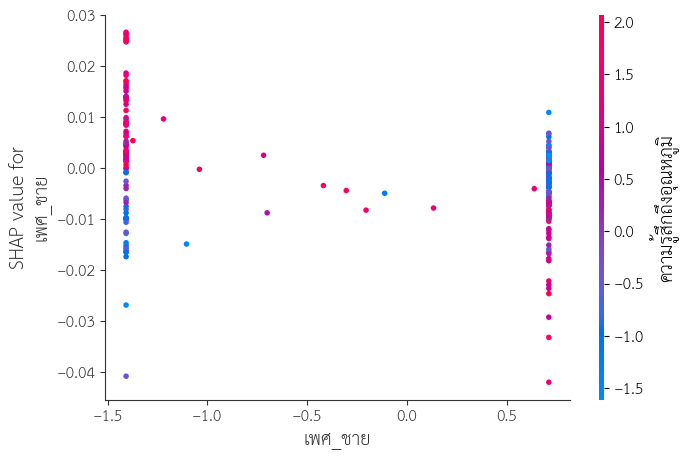

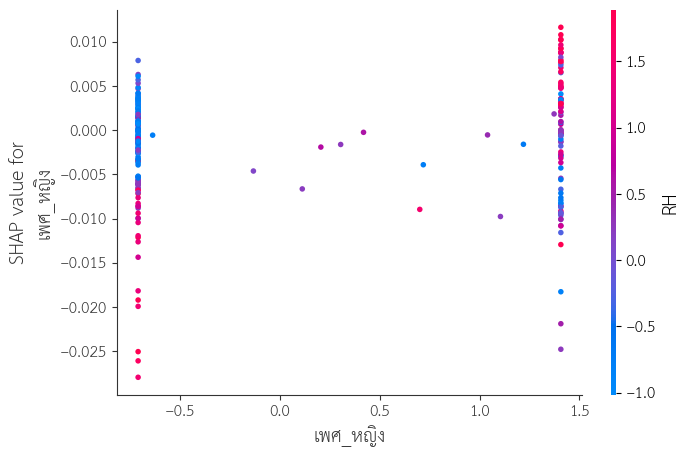

In [94]:
for name in X_train_res.columns:
  shap.dependence_plot(name, shapValues, X_train_res, feature_names = X_train_res.columns)

###PDP

<Axes: >

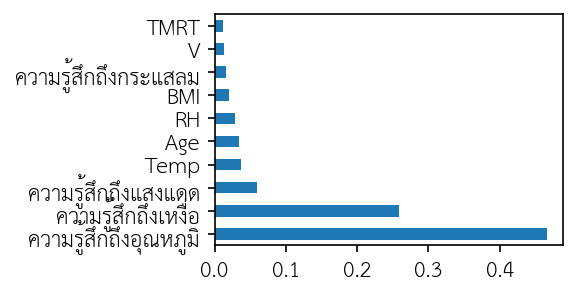

In [ ]:
fig, ax = plt.subplots(figsize=(3, 2), dpi=150)
pd.Series(resultss.feature_importances_, index=X_test_scaled.columns)\
    .nlargest(10)\
    .plot(kind='barh', ax=ax)

In [ ]:
base_features = [ 'ความรู้สึกถึงอุณหภูมิ', 'ความรู้สึกถึงเหงื่อ', 'ความรู้สึกถึงแสงแดด']

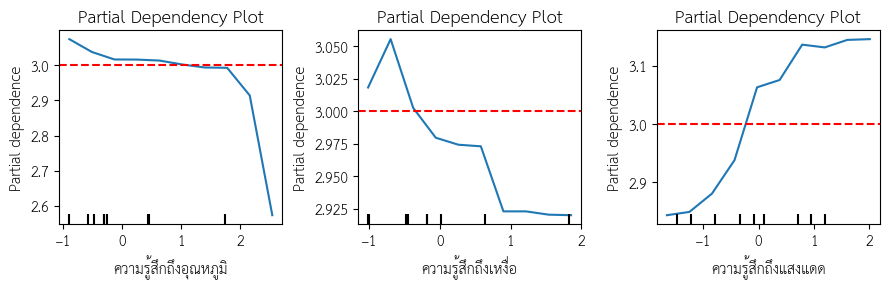

In [ ]:
n_cols = len(base_features)  # จำนวนคอลัมน์ตามจำนวน features
fig, axs = plt.subplots(nrows=1, ncols=n_cols, figsize=(n_cols * 3, 3))  # ปรับขนาดให้เหมาะสม

for i, bf in enumerate(base_features):
    PartialDependenceDisplay.from_estimator(
        resultss,
        X_test_scaled,
        features=[bf],
        feature_names=base_features,
        grid_resolution = 10,
        ax=axs[i]  # ใช้ axis ที่ i
    )
    plt.axhline(y=3.00, color='r', linestyle='--', label='y = 0.48')
    axs[i].set_title("Partial Dependency Plot")

plt.tight_layout()
plt.show()

In [ ]:
for i, bf in enumerate(base_features):
    PartialDependenceDisplay.from_estimator(
        Log_reg,
        X_train_res,
        features=[bf],
        feature_names=base_features,
        ax=axs[i]  # ใช้ axis ที่ i
    )
    plt.axhline(y=0.50, color='r', linestyle='--', label='y = 0.48')  # เลื่อนมาที่นี่
    axs[i].set_title("Partial Dependency Plot")

plt.tight_layout()
plt.show()

##ANN

In [ ]:
from sklearn.neural_network import MLPRegressor

In [ ]:
mlp = MLPRegressor(random_state=42, n_iter_no_change=3, learning_rate_init=0.001)

# Define the parameter grid for tuning
param_grid = {
    'max_iter': [100, 200, 300, 400],
    'hidden_layer_sizes': [(50,), (25, 50), (25, 25, 50)],
    'activation': ['relu', 'tanh', 'identity', 'logistic'],
    'solver': ['adam', 'lbfgs', 'sgd'],
    'alpha': [0.0001, 0.001, 0.01],
    'learning_rate': ['constant', 'invscaling', 'adaptive'],
}

# Create the GridSearchCV object
grid_search_mlp = GridSearchCV(mlp, param_grid, scoring='neg_mean_squared_error', cv=5, n_jobs=-1, verbose=1)

# Fit the model on the training data
grid_search_mlp.fit(X_train_res, y2_train_res)

# Print the best parameters found during the search
print("Best parameters found: ", grid_search_mlp.best_params_)

# Evaluate the model on the test data
best_score = np.sqrt(-1 * grid_search_mlp.best_score_)
print("Test score: ", best_score)

Fitting 5 folds for each of 1296 candidates, totalling 6480 fits
Best parameters found:  {'activation': 'relu', 'alpha': 0.001, 'hidden_layer_sizes': (25, 50), 'learning_rate': 'constant', 'max_iter': 300, 'solver': 'lbfgs'}
Test score:  0.5868006747939899


In [ ]:
print("Best parameters :", grid_search_mlp.best_score_)
print("Best accuracy :", grid_search_mlp.best_params_)

Best parameters : -0.3443350319386819
Best accuracy : {'activation': 'relu', 'alpha': 0.001, 'hidden_layer_sizes': (25, 50), 'learning_rate': 'constant', 'max_iter': 300, 'solver': 'lbfgs'}


In [ ]:
mlp_reg = MLPRegressor(activation='relu', alpha=0.001, hidden_layer_sizes=(25, 50), learning_rate='constant', max_iter=400, solver='lbfgs')

# Train the model
resultsss = mlp_reg.fit(X_train_res, y2_train_res)

# Make predictions on the test set
y_pred = mlp_reg.predict(X_test_scaled)
#print(confusion_matrix(y3_test,y_pred))
#print(classification_report(y3_test,y_pred))
print('MSE_train:', format(mean_squared_error(y2_train_res, resultsss.predict(X_train_res))))
print('MSE_test:', format(mean_squared_error(y2_test, resultsss.predict(X_test_scaled))))

print('MAE_train:', format(mean_absolute_error(y2_train_res, resultsss.predict(X_train_res))))
print('MAE_test:', format(mean_absolute_error(y2_test, resultsss.predict(X_test_scaled))))

MSE_train: 2.8001462651847197e-05
MSE_test: 1.2697176834245774
MAE_train: 0.003241401631922144
MAE_test: 0.7826653797120414


In [ ]:
mlp_reg = MLPRegressor(activation='relu', alpha=0.01, hidden_layer_sizes=(50, 75, 100), learning_rate='constant', max_iter=200, solver='lbfgs')

# Train the model
resultsss = mlp_reg.fit(X_train_res, y2_train_res)

# Make predictions on the test set
y_pred = mlp_reg.predict(X_test_scaled)
#print(confusion_matrix(y3_test,y_pred))
#print(classification_report(y3_test,y_pred))
print('MSE_train:', format(mean_squared_error(y2_train_res, resultsss.predict(X_train_res))))
print('MSE_test:', format(mean_squared_error(y2_test, resultsss.predict(X_test_scaled))))

print('MAE_train:', format(mean_absolute_error(y2_train_res, resultsss.predict(X_train_res))))
print('MAE_test:', format(mean_absolute_error(y2_test, resultsss.predict(X_test_scaled))))

#print("R-squared Score_train:", format(r2_score(y2_train_res, resultsss.predict(X_train_res))))
#print("R-squared Score_test:", format(r2_score(y2_test, resultsss.predict(X_test_scaled))))

MSE_train: 0.00010085879966627211
MSE_test: 1.2963784733399686
MAE_train: 0.007892534087963457
MAE_test: 0.8064130069146579


In [ ]:
mlp = MLPRegressor(random_state=42, n_iter_no_change=3, learning_rate_init=0.001)

# Define the parameter grid for tuning
param_grid = {
    'max_iter': [100, 200, 300, 400],
    'hidden_layer_sizes': [(50,), (25, 50), (25, 25, 50)],
    'activation': ['relu', 'tanh', 'identity', 'logistic'],
    'solver': ['adam', 'lbfgs', 'sgd'],
    'alpha': [0.0001, 0.001, 0.01],
    'learning_rate': ['constant', 'invscaling', 'adaptive'],
}

# Create the GridSearchCV object
grid_search_mlp = GridSearchCV(mlp, param_grid, scoring='neg_mean_squared_error', cv=kfold, n_jobs=-1, verbose=1)

# Fit the model on the training data
grid_search_mlp.fit(X_train_res, y2_train_res)

# Print the best parameters found during the search
print("Best parameters found: ", grid_search_mlp.best_params_)

# Evaluate the model on the test data
best_score = np.sqrt(-1 * grid_search_mlp.best_score_)
print("Test score: ", best_score)

Fitting 5 folds for each of 1296 candidates, totalling 6480 fits
Best parameters found:  {'activation': 'tanh', 'alpha': 0.01, 'hidden_layer_sizes': (50,), 'learning_rate': 'constant', 'max_iter': 400, 'solver': 'adam'}
Test score:  0.5486513459844236


In [ ]:
print("Best accuracy :", grid_search_mlp.best_score_)
print("Best parameters :", grid_search_mlp.best_params_)

Best accuracy : -0.3010182994505196
Best parameters : {'activation': 'tanh', 'alpha': 0.01, 'hidden_layer_sizes': (50,), 'learning_rate': 'constant', 'max_iter': 400, 'solver': 'adam'}


In [ ]:
mlp_reg = MLPRegressor(activation='tanh', alpha=0.01, hidden_layer_sizes=(50,), learning_rate='constant', max_iter=400, solver='adam')

# Train the model
resultsss = mlp_reg.fit(X_train_res, y2_train_res)

# Make predictions on the test set
y_pred = mlp_reg.predict(X_test_scaled)
#print(confusion_matrix(y3_test,y_pred))
#print(classification_report(y3_test,y_pred))
print('MSE_train:', format(mean_squared_error(y2_train_res, resultsss.predict(X_train_res))))
print('MSE_test:', format(mean_squared_error(y2_test, resultsss.predict(X_test_scaled))))

print('MAE_train:', format(mean_absolute_error(y2_train_res, resultsss.predict(X_train_res))))
print('MAE_test:', format(mean_absolute_error(y2_test, resultsss.predict(X_test_scaled))))

MSE_train: 0.13071217102935437
MSE_test: 0.7104457395813966
MAE_train: 0.264431933883272
MAE_test: 0.6004287072357426


###SHAP

  0%|          | 0/288 [00:00<?, ?it/s]

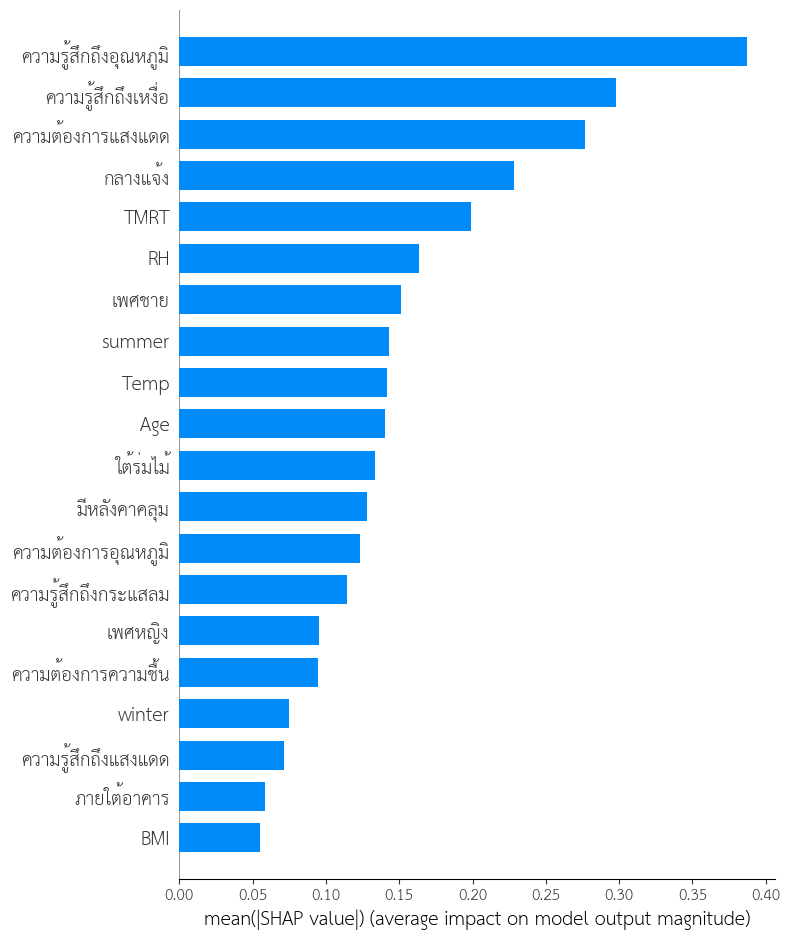

In [ ]:
explainer = shap.KernelExplainer(mlp_reg.predict, X_train_res)
shapValues = explainer.shap_values(X_train_res)

# Explainer details
#shapExplainer.__dict__

# Summary features contribute in model
shap.summary_plot(shapValues, X_train_res, plot_type = 'bar')

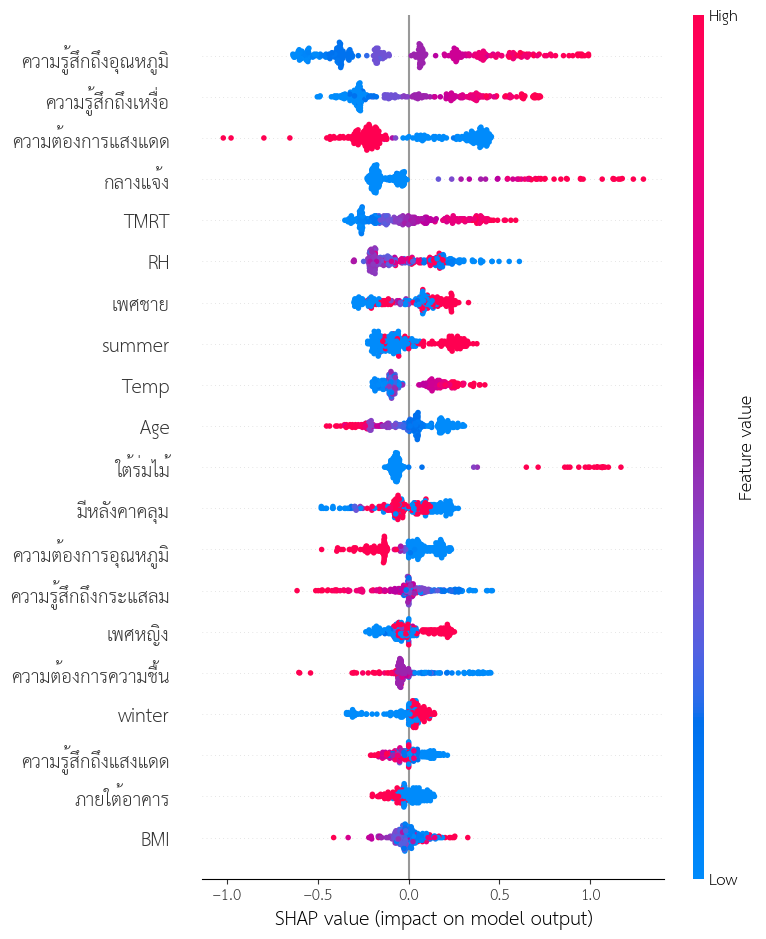

In [ ]:
shap.summary_plot(shapValues, X_train_res)

###PDP

In [ ]:
fig, ax = plt.subplots(figsize=(3, 2), dpi=150)
pd.Series(resultss.feature_importances_, index=X.columns)\
    .nlargest(10)\
    .plot(kind='barh', ax=ax)

In [ ]:
base_features = ['ความรู้สึกถึงอุณหภูมิ', 'ความรู้สึกถึงเหงื่อ', 'ความต้องการแสงแดด']

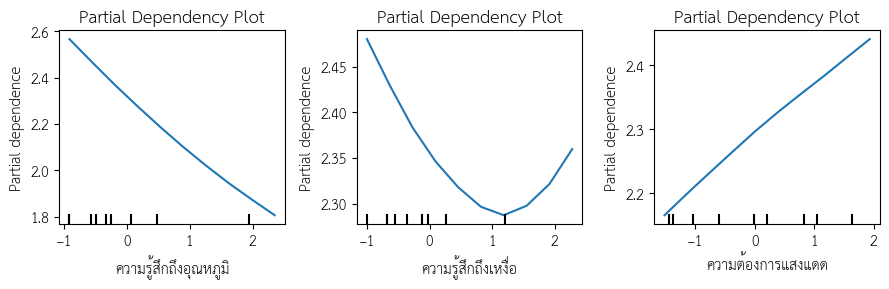

In [ ]:
n_cols = len(base_features)  # จำนวนคอลัมน์ตามจำนวน features
fig, axs = plt.subplots(nrows=1, ncols=n_cols, figsize=(n_cols * 3, 3))  # ปรับขนาดให้เหมาะสม

for i, bf in enumerate(base_features):
    PartialDependenceDisplay.from_estimator(
        resultsss,
        X_train_res,
        features=[bf],
        feature_names=base_features,
        grid_resolution = 10,
        ax=axs[i]  # ใช้ axis ที่ i
    )
    axs[i].set_title("Partial Dependency Plot")

plt.tight_layout()
plt.show()